# Plotting Figures from Seager et al. 2019

In [5]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [7]:
import xarray as xr
from src.constants import FIGURE_DATA_PATH

In [8]:
print(xr.open_dataset(FIGURE_DATA_PATH))

<xarray.Dataset>
Dimensions:                                         (X: 180, X_01: 360, X_02: 359, Y: 161, Y_01: 160, Yu: 59, Yv: 60, lat: 121, lon: 360)
Coordinates:
  * X                                               (X) float32 0.0 ... 358.0
  * Yu                                              (Yu) float32 -58.0 ... 58.0
  * Yv                                              (Yv) float32 -59.0 ... 59.0
  * X_01                                            (X_01) float32 0.0 ... 359.0
  * Y                                               (Y) float32 -80.0 ... 80.0
  * lat                                             (lat) float32 -60.0 ... 60.0
  * lon                                             (lon) float32 0.0 ... 359.0
  * X_02                                            (X_02) float32 0.5 ... 358.5
  * Y_01                                            (Y_01) float32 -79.5 ... ...
Data variables: (12/125)
    CoupledModel.Fig_3.nc.epsu                      timedelta64[ns] ...
    CoupledMod

In [18]:
from typing import List
def return_var_list(num: int) -> List[str]:
    var_list = []
    for var in xr.open_dataset(FIGURE_DATA_PATH):
        if "Fig_" + str(num) in var:
            var_list.append(var)
    return var_list

In [15]:
for i in range(1, 6):
    print(return_var_list(i))

['ForcedOceanModel.sst-trend-Fig_1d.nc.SST', 'ForcedOceanModel.sst-trend-Fig_1e.nc.SST', 'ForcedOceanModel.sst-trend-Fig_1f.nc.SST']
['ForcedAtmosphereModel.Fig_2c.nc.epsu', 'ForcedAtmosphereModel.Fig_2c.nc.epsv', 'ForcedAtmosphereModel.Fig_2c.nc.Hq', 'ForcedAtmosphereModel.Fig_2c.nc.K', 'ForcedAtmosphereModel.Fig_2c.nc.mask', 'ForcedAtmosphereModel.Fig_2c.nc.phitrend', 'ForcedAtmosphereModel.Fig_2c.nc.prClim', 'ForcedAtmosphereModel.Fig_2c.nc.PRtrend', 'ForcedAtmosphereModel.Fig_2c.nc.Qthtrend', 'ForcedAtmosphereModel.Fig_2c.nc.spClim', 'ForcedAtmosphereModel.Fig_2c.nc.tsClim', 'ForcedAtmosphereModel.Fig_2c.nc.tstrend', 'ForcedAtmosphereModel.Fig_2c.nc.utrend', 'ForcedAtmosphereModel.Fig_2c.nc.vtrend', 'ForcedAtmosphereModel.Fig_2c.nc.wnspClim', 'ForcedAtmosphereModel.Fig_2d.nc.epsu', 'ForcedAtmosphereModel.Fig_2d.nc.epsv', 'ForcedAtmosphereModel.Fig_2d.nc.Hq', 'ForcedAtmosphereModel.Fig_2d.nc.K', 'ForcedAtmosphereModel.Fig_2d.nc.mask', 'ForcedAtmosphereModel.Fig_2d.nc.phitrend', 'For

In [26]:
from src.plot_utils import label_subplots, add_units
from src.xr_utils import sel
import matplotlib.pyplot as plt

In [50]:
rename_dict = {
    ("Y_01", "X_02"): {"X_02": "X", "Y_01": "Y"},
    ("Yu", "X"): {"X": "X", "Yu": "Y"},
    ("Yv", "X"): {"X": "X", "Yv": "Y"},
    ("Y", "X_01"): {"X_01": "X", "Y": "Y"},
    ("lat", "lon"): {"lon": "X", "lat": "Y"},
}

d–f, Simulations from the ocean model forced by rising CO2 and observed winds (d), observed winds only, with fixed CO2 (e) and rising CO2 with fixed winds (f). The observed SST trend of no warming in the cold tongue amid widespread warming can be reproduced by the ocean model as a combined thermodynamic and dynamic response to CO2 and wind stress change.

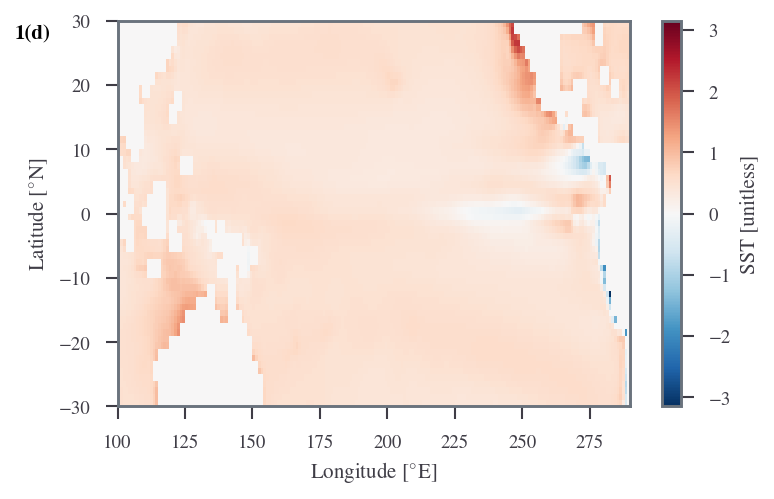

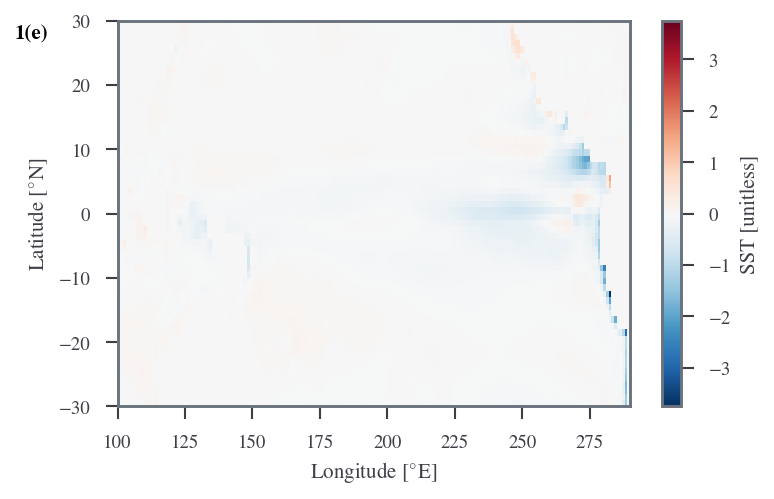

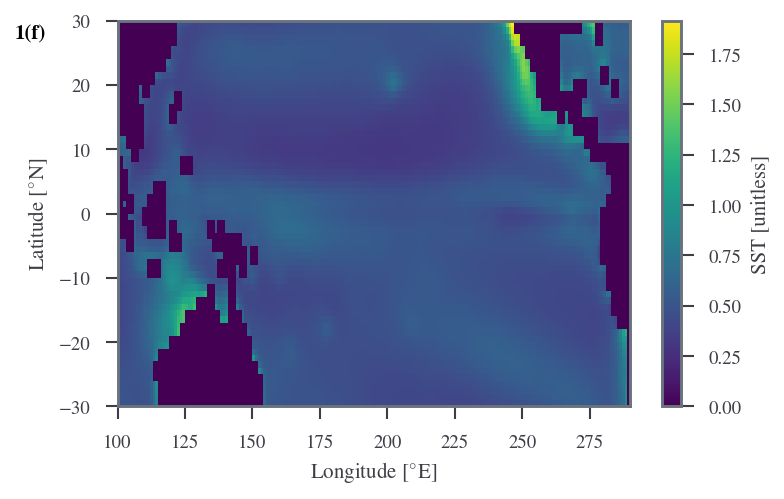

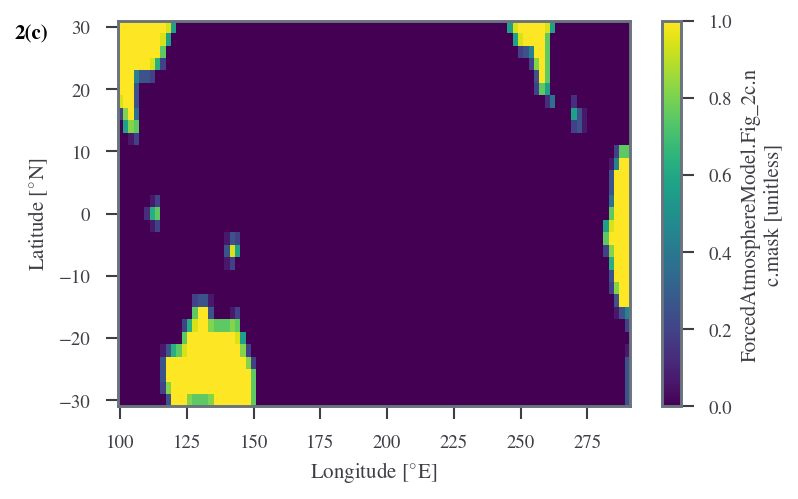

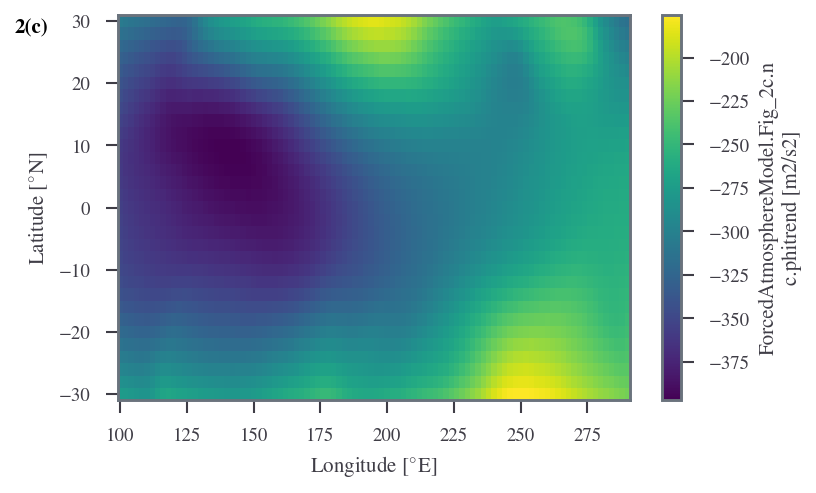

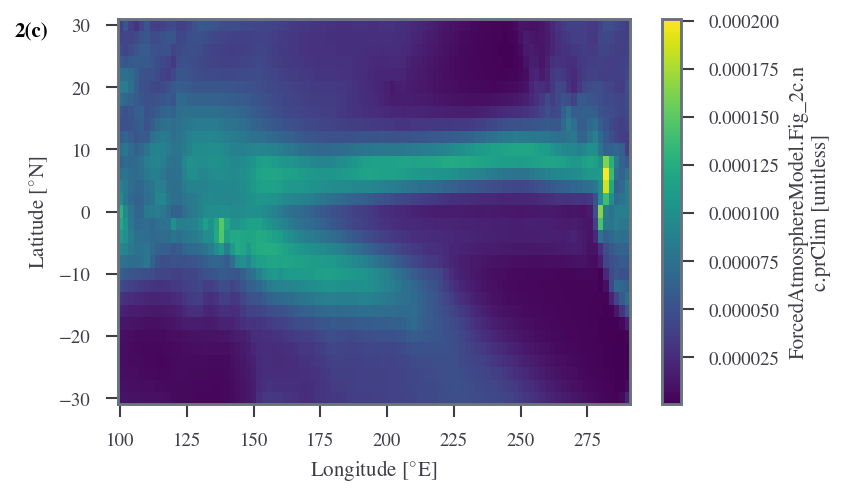

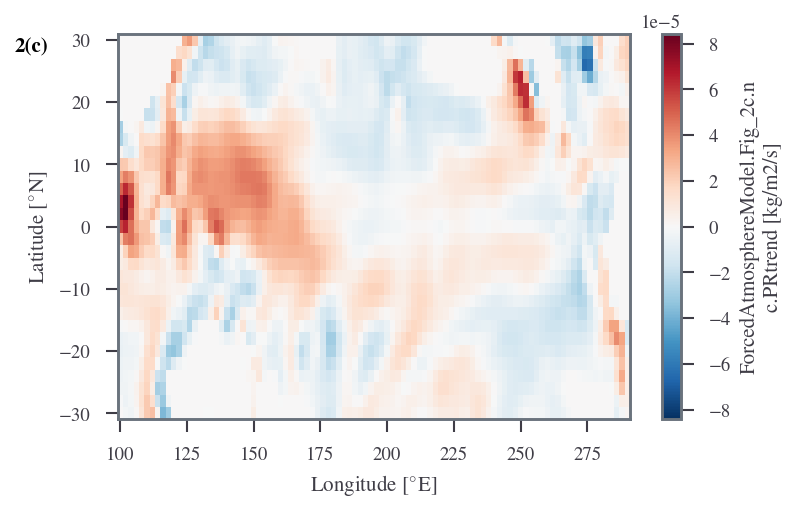

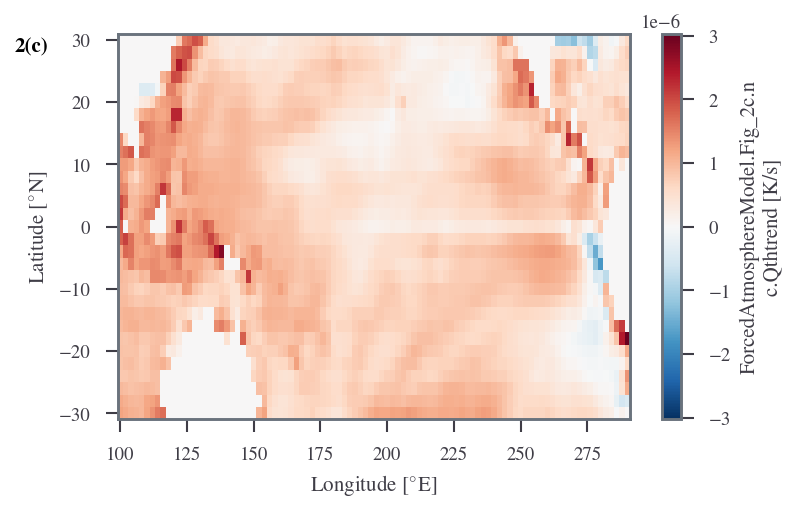

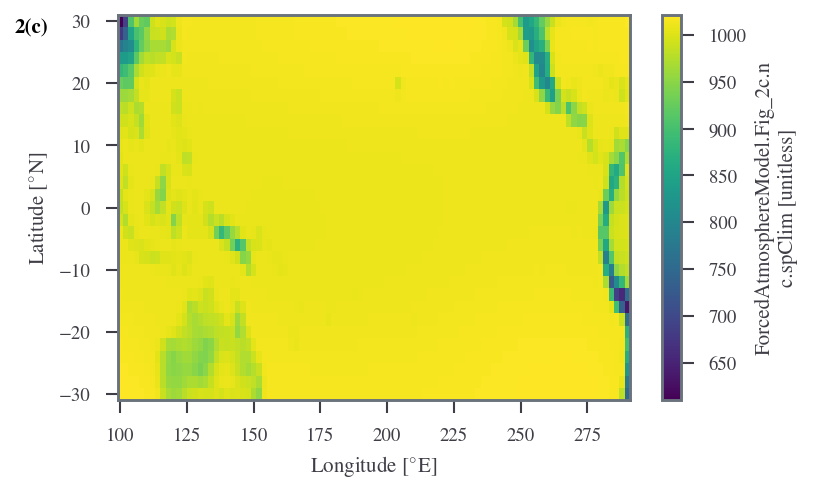

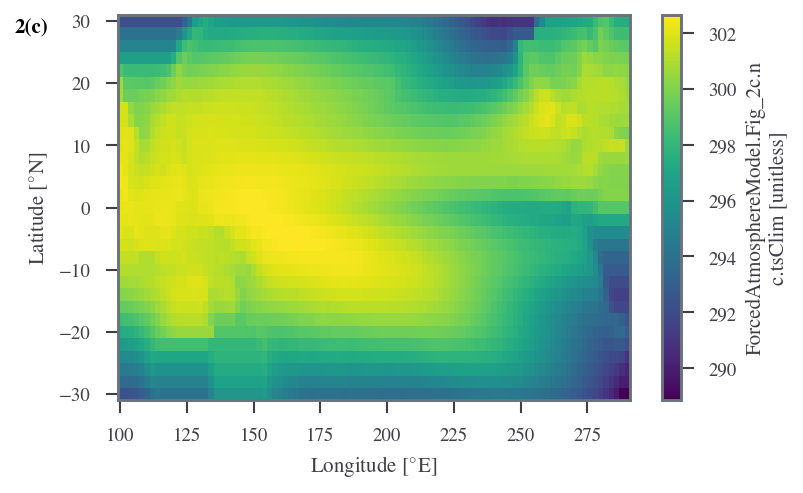

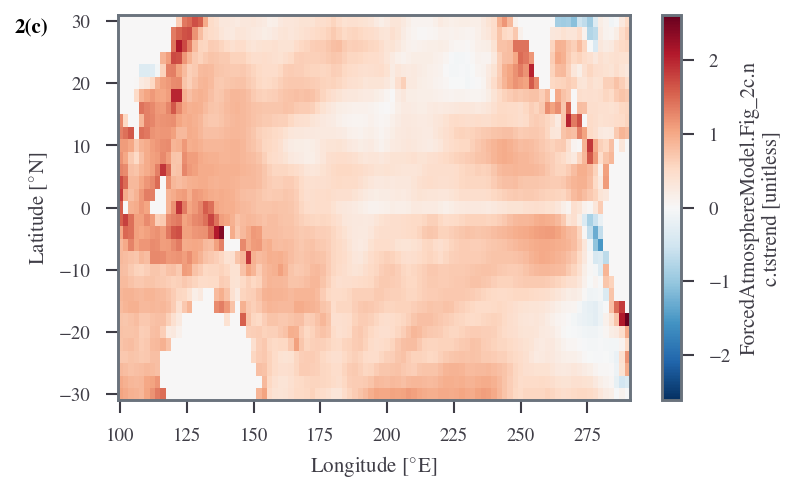

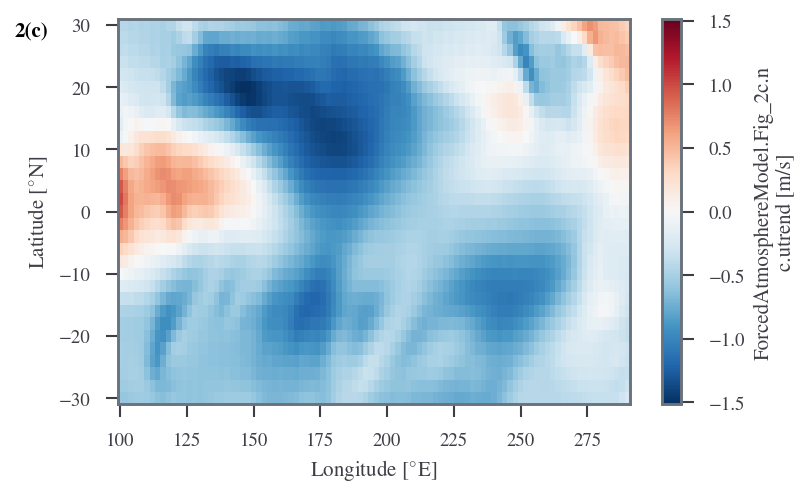

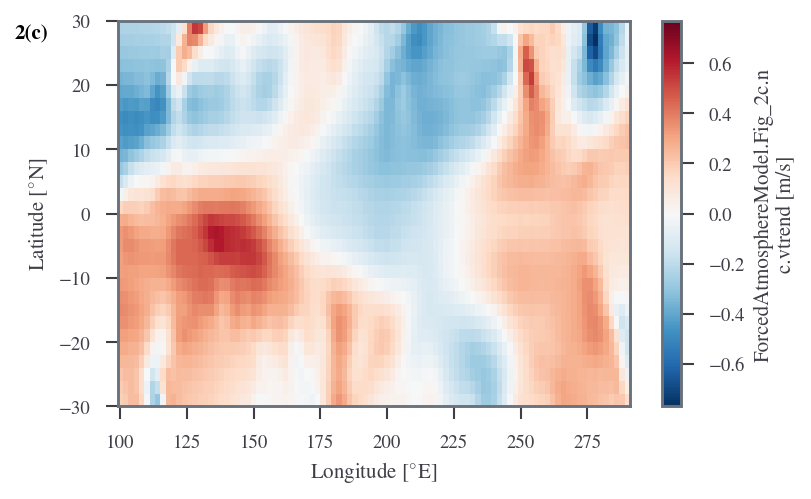

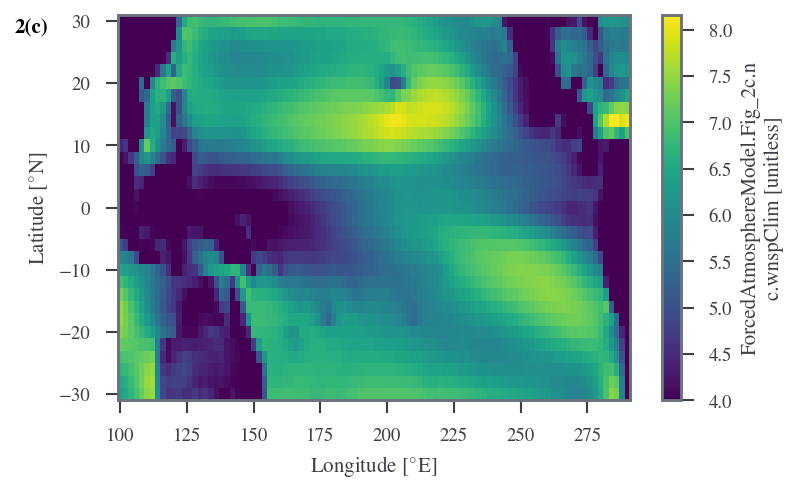

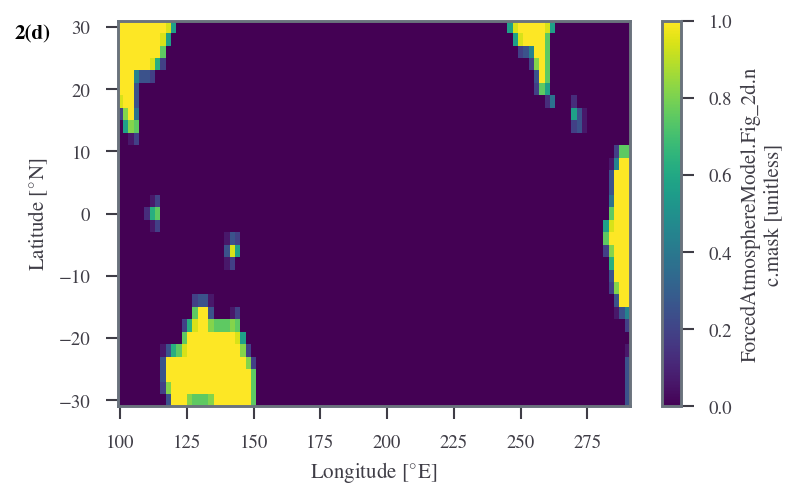

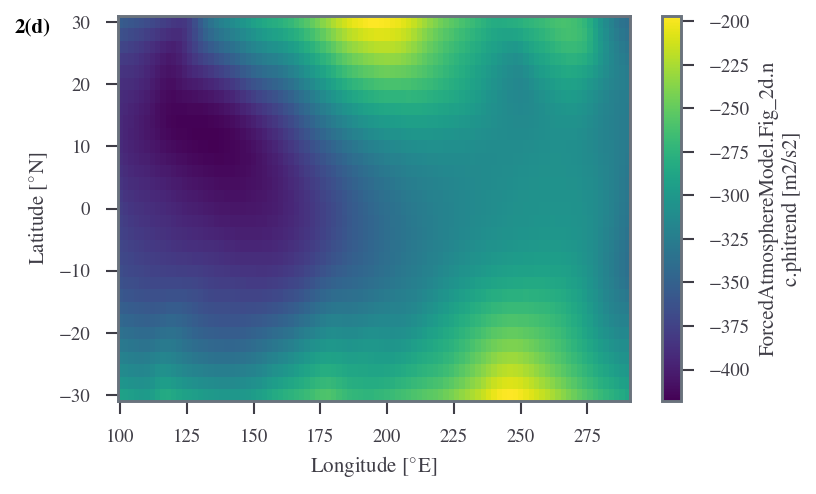

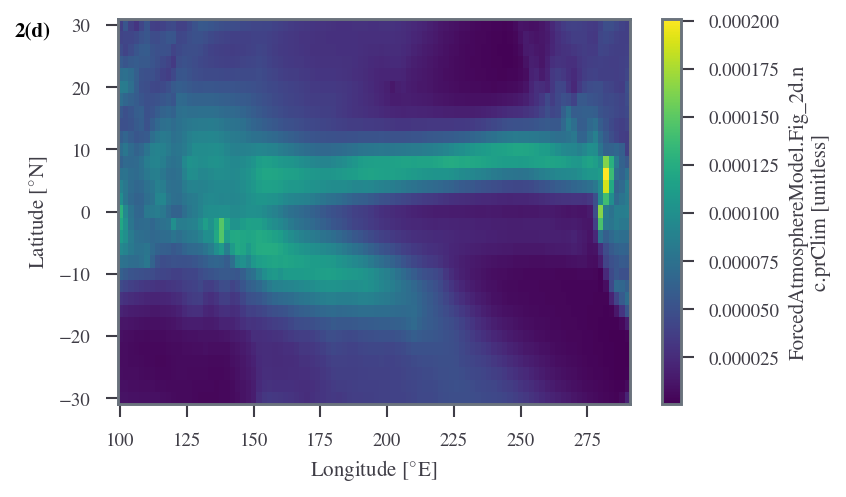

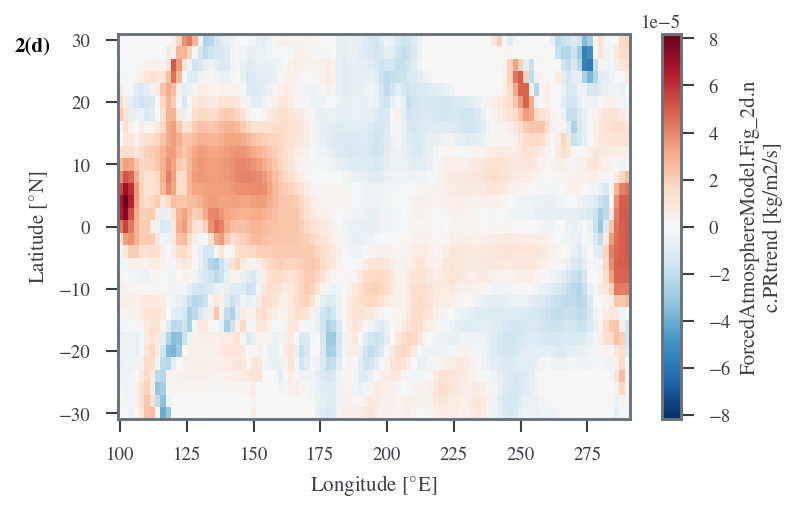

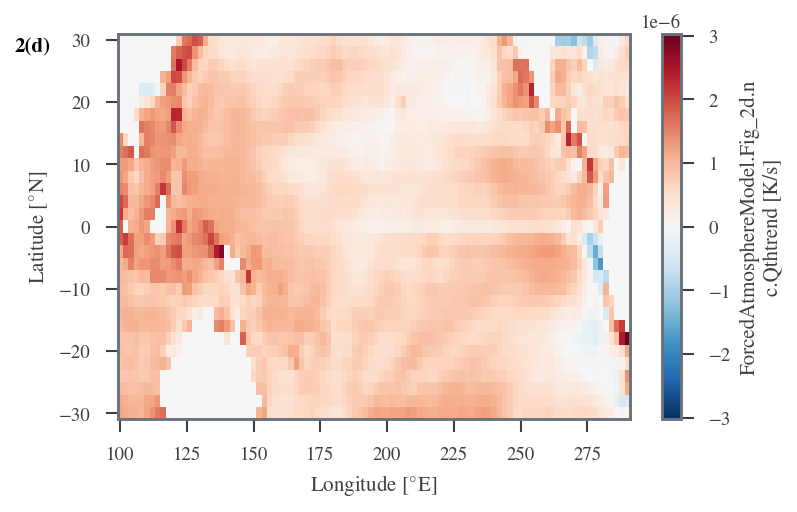

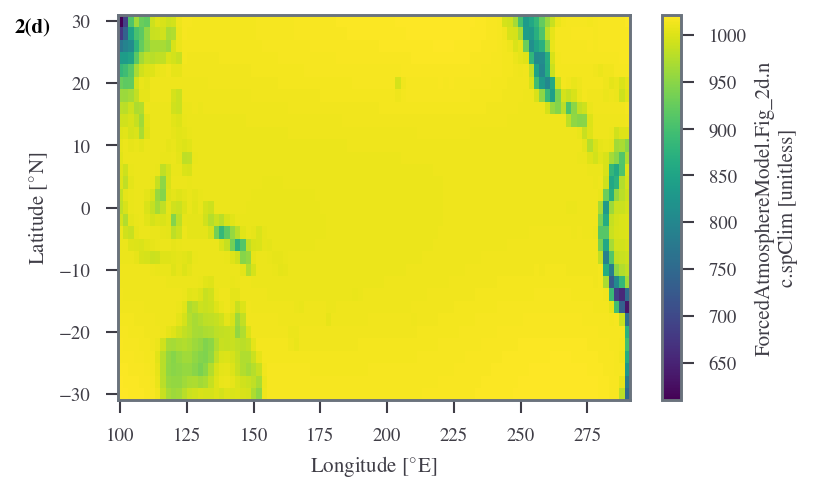

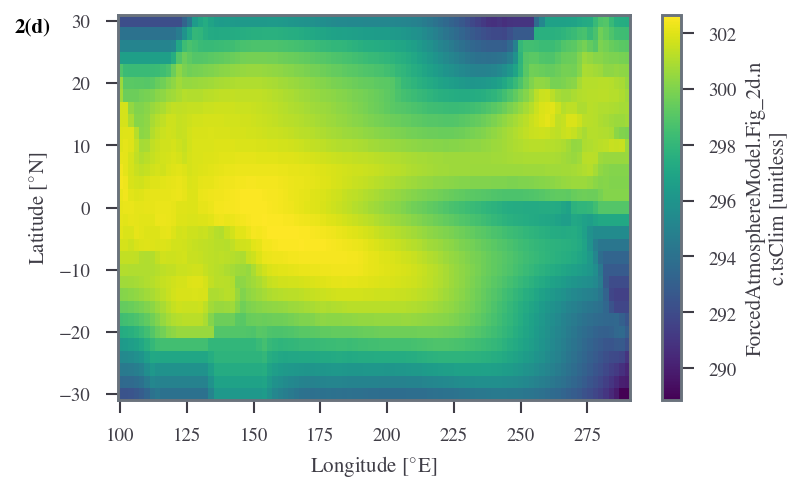

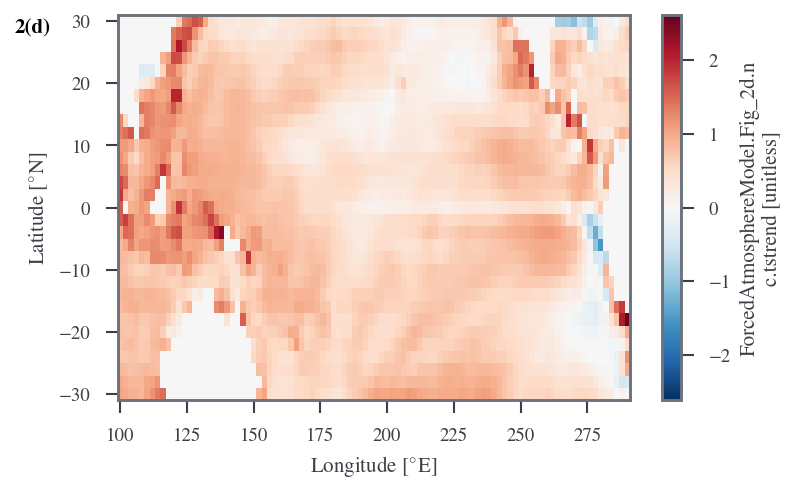

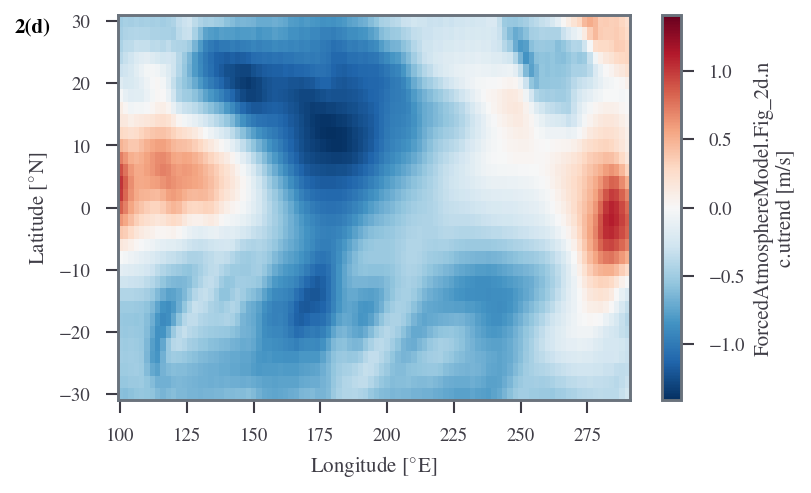

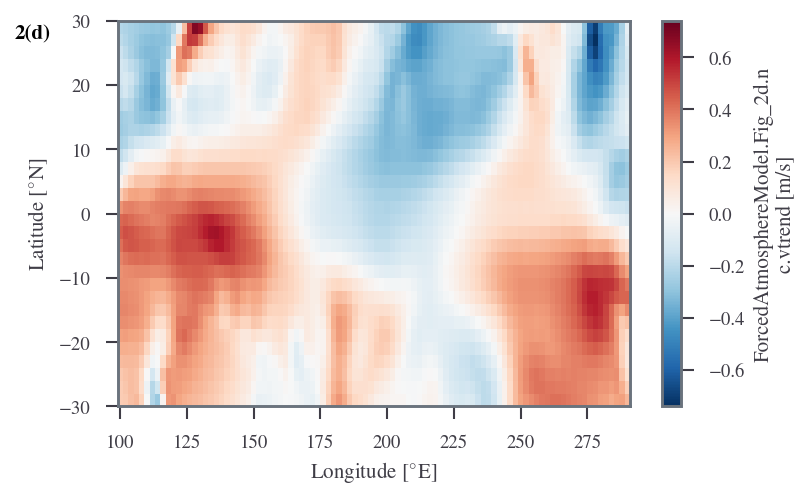

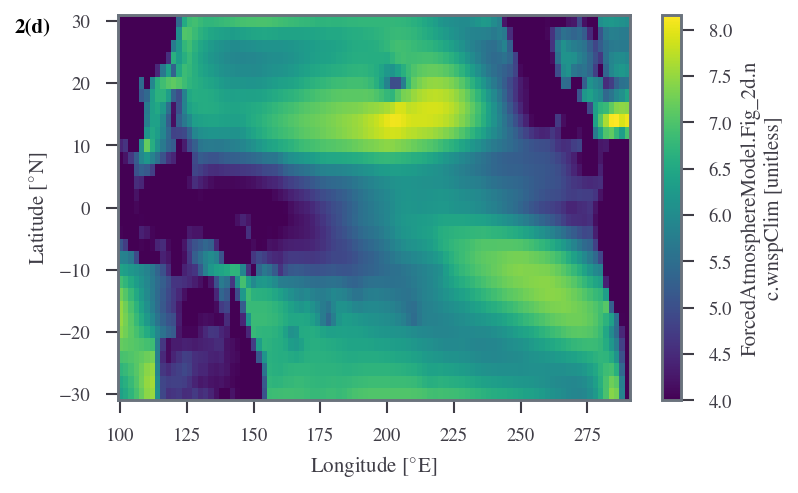

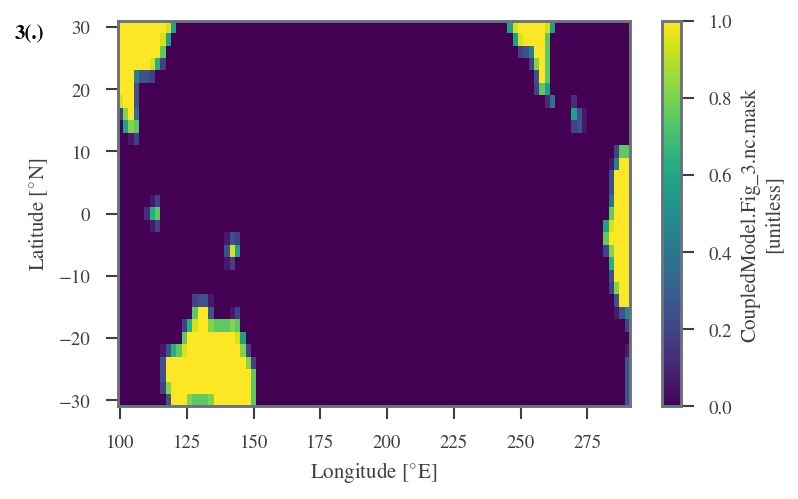

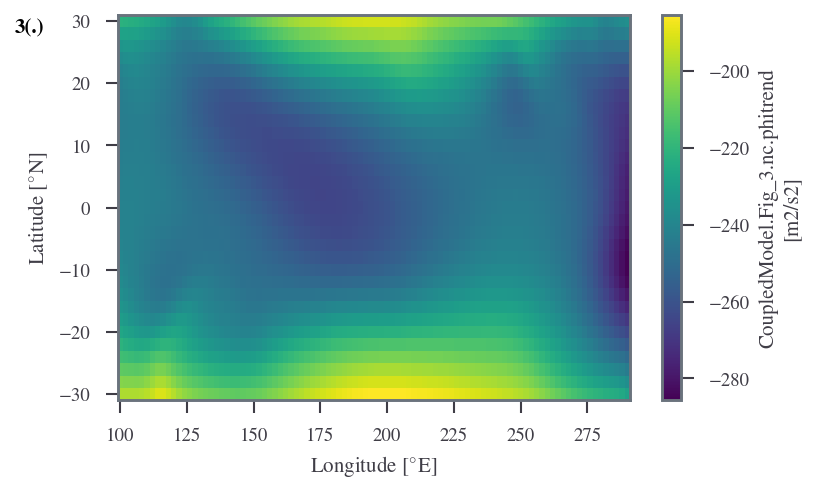

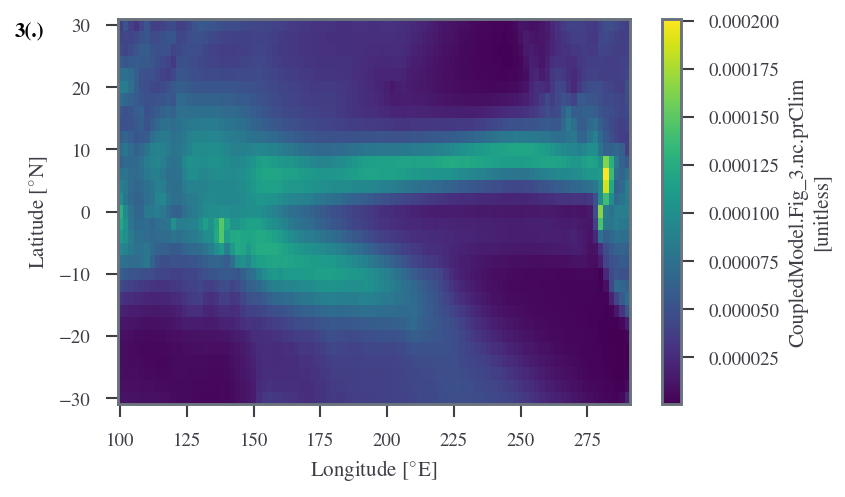

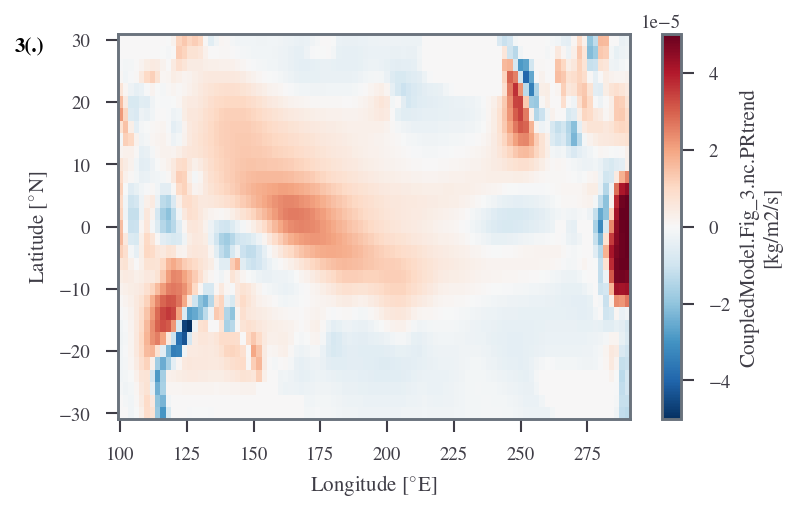

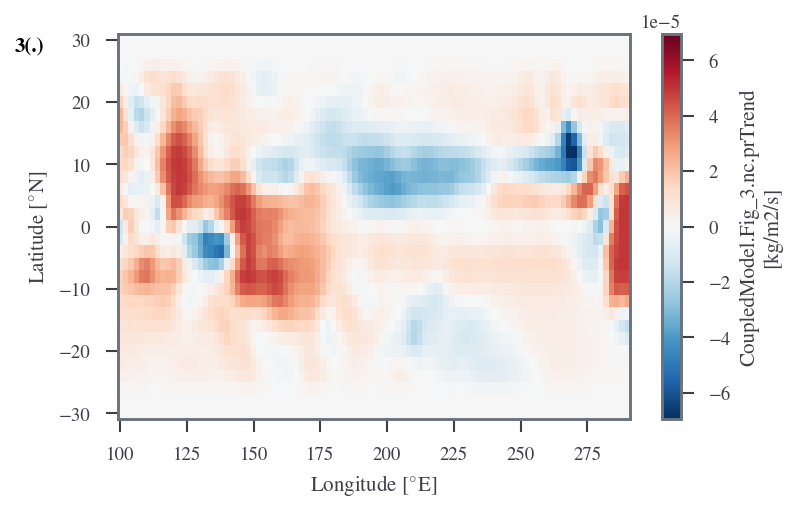

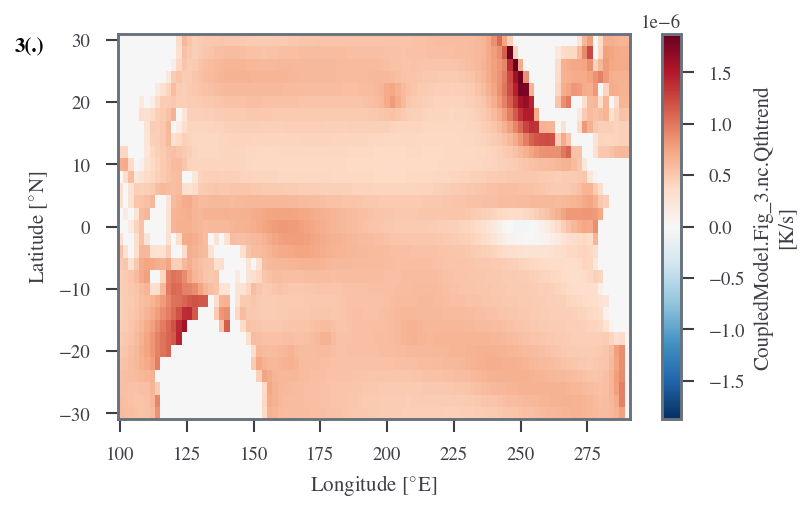

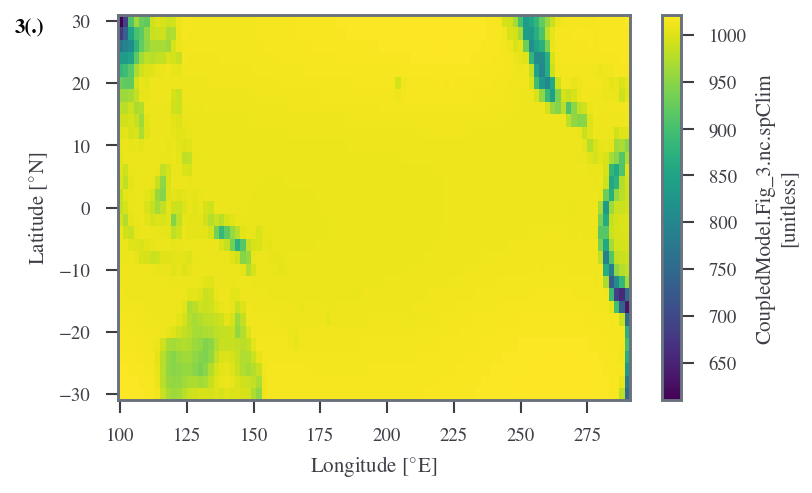

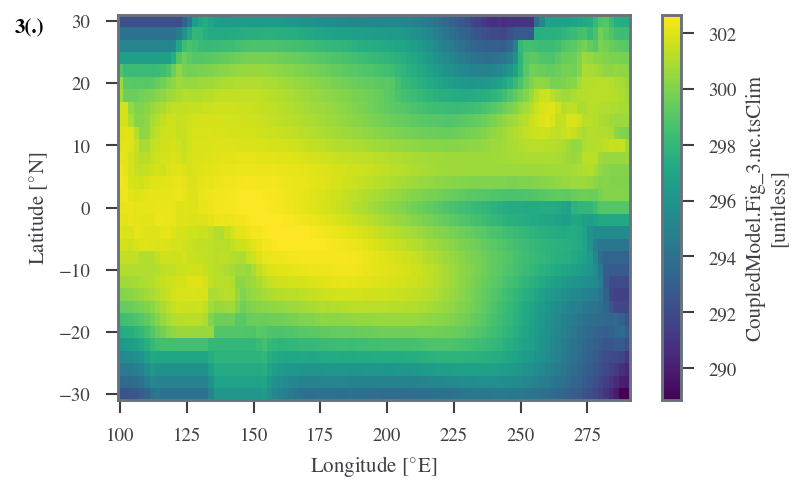

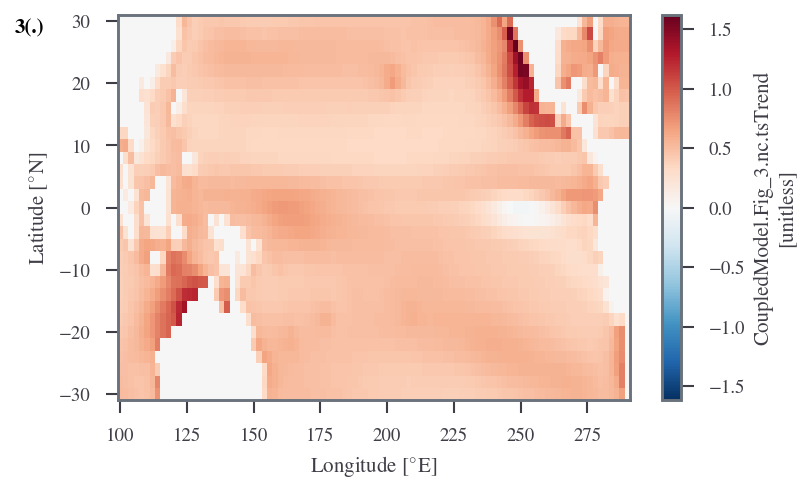

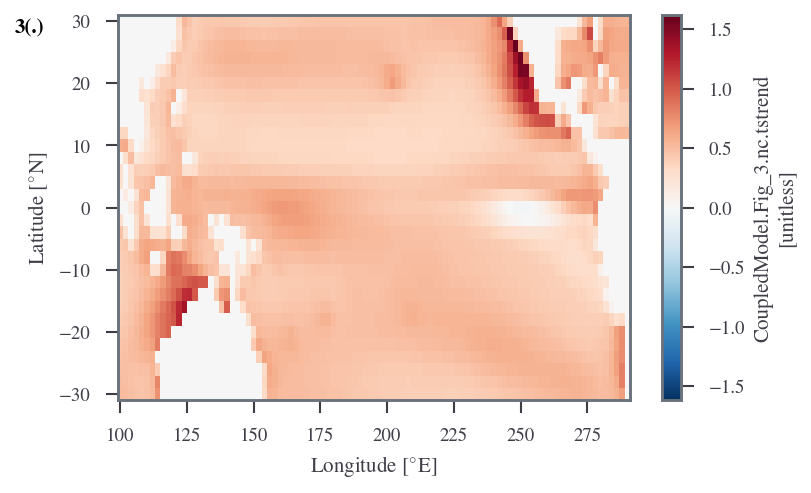

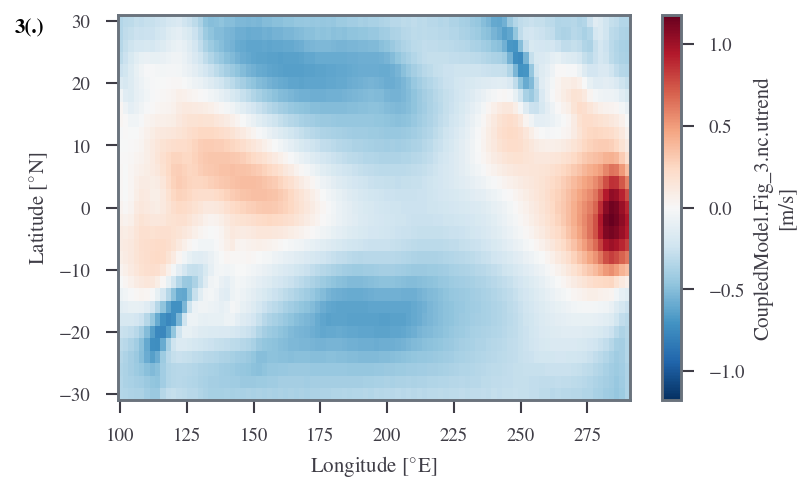

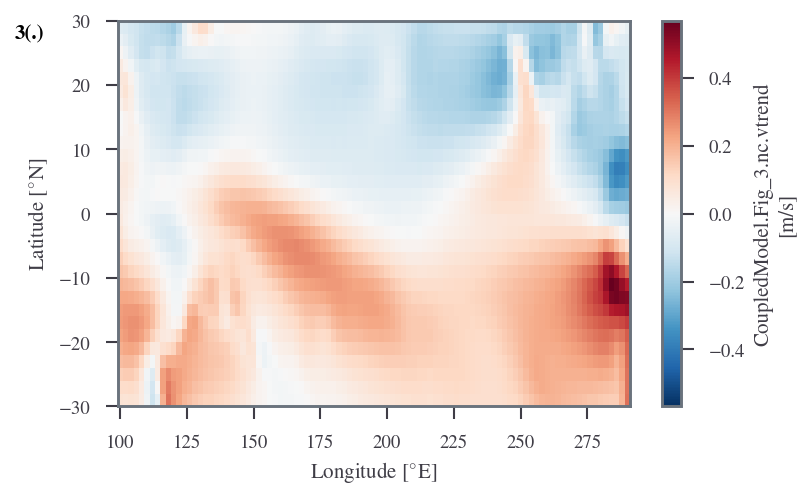

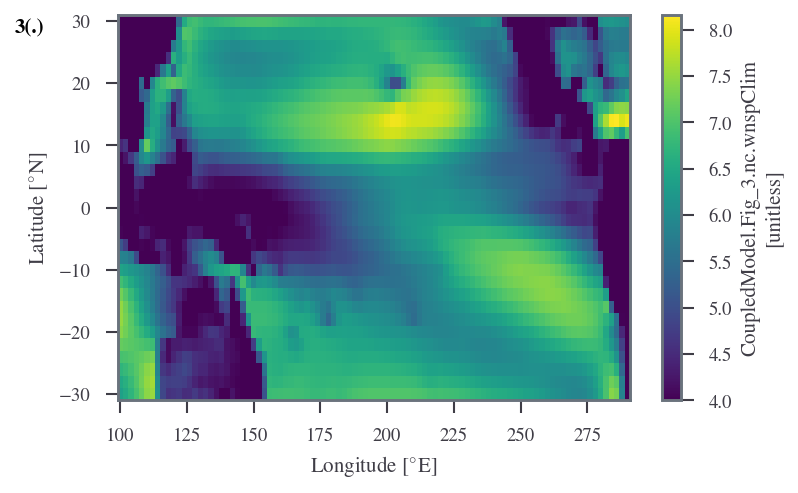

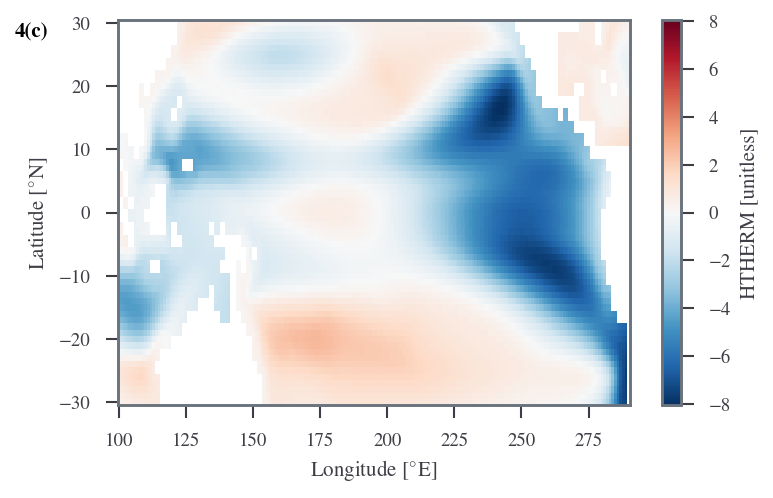

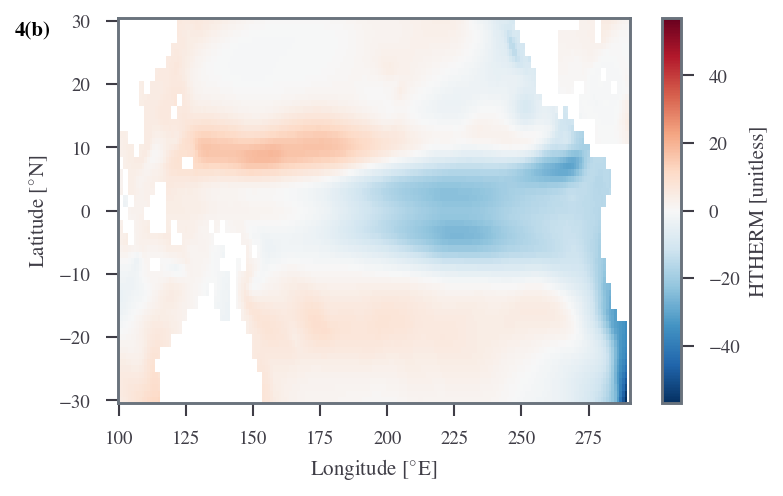

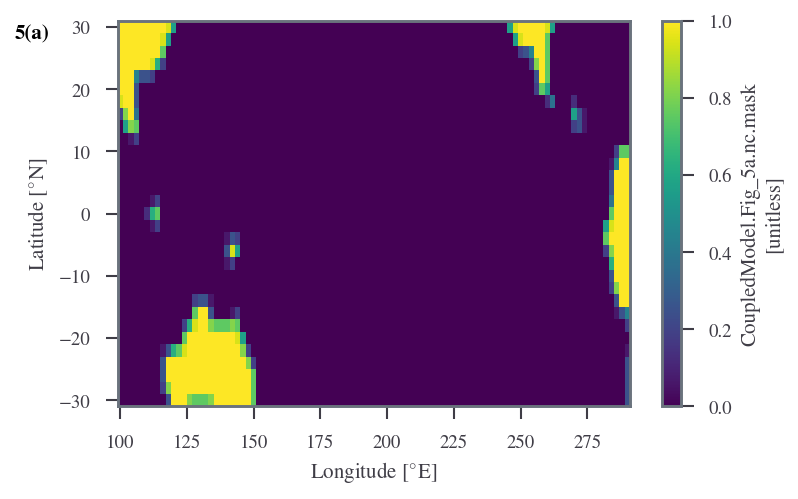

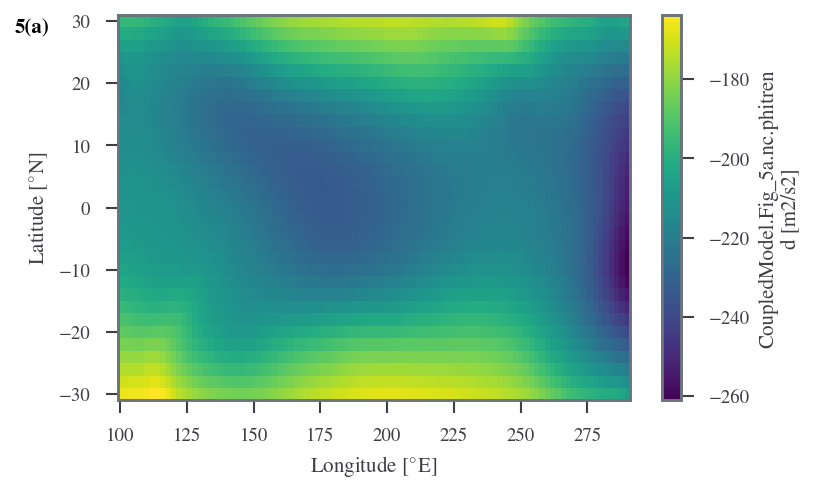

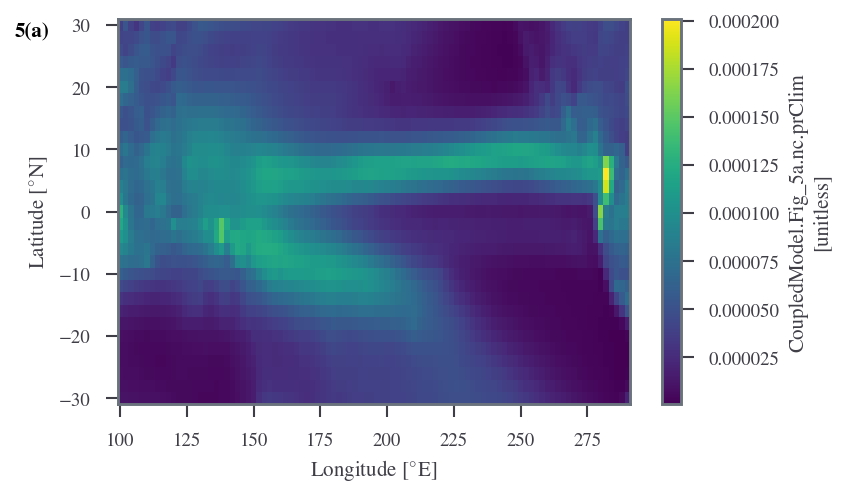

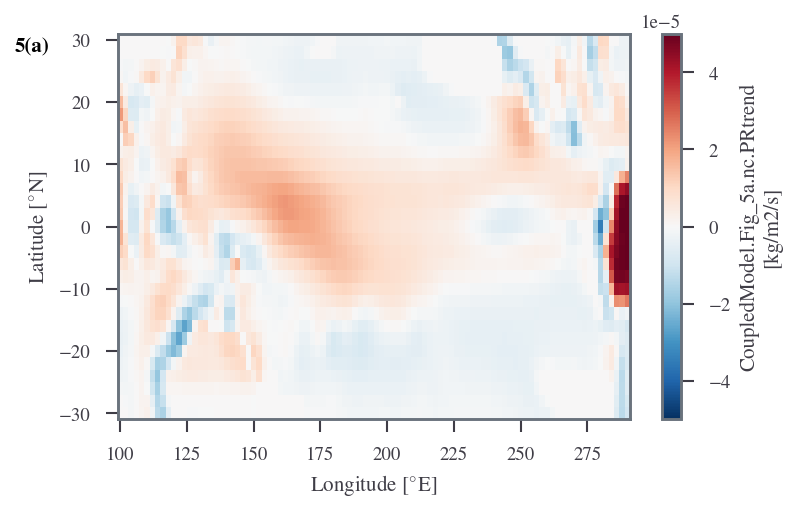

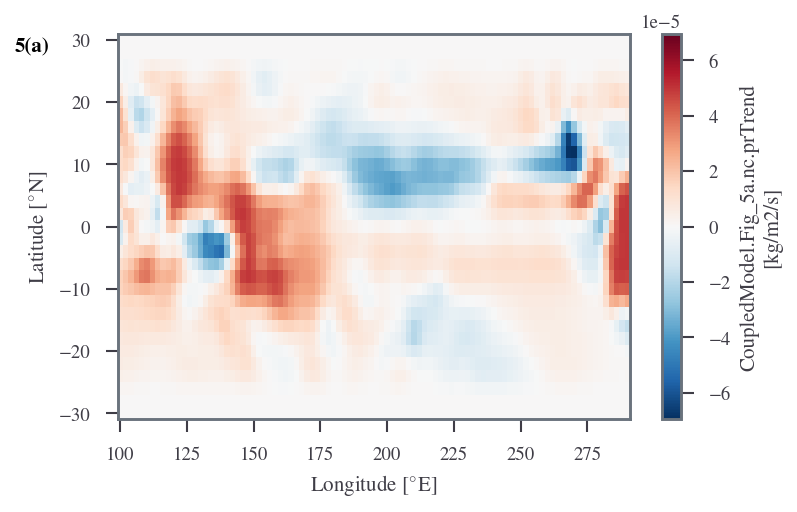

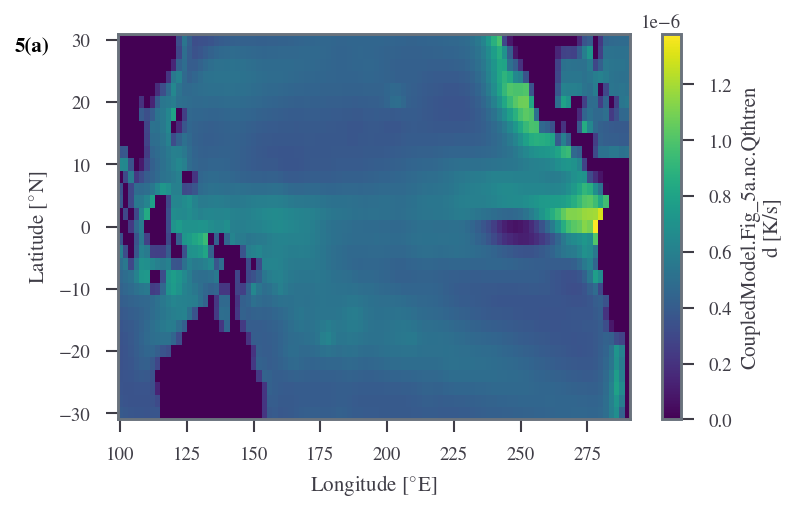

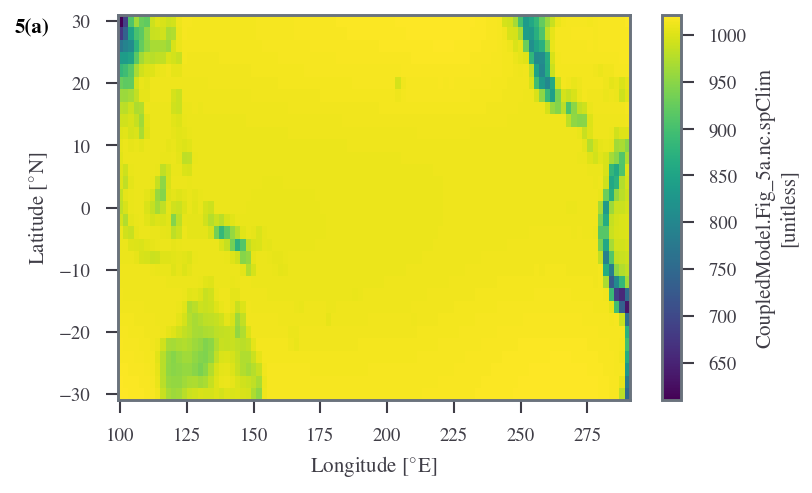

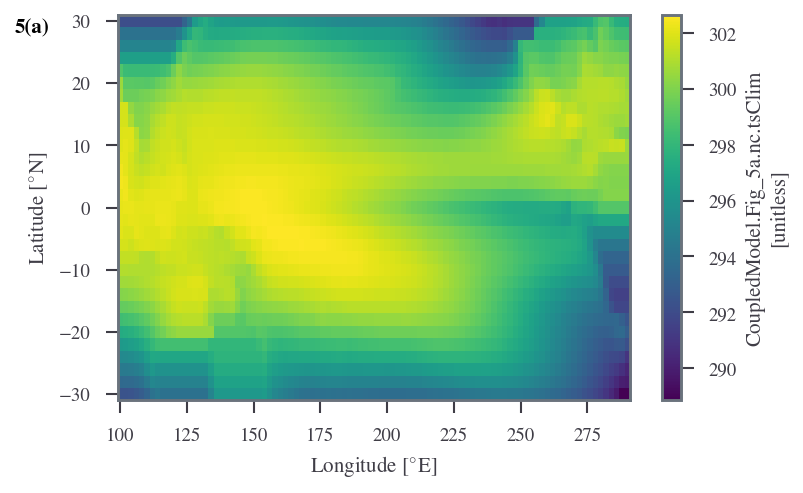

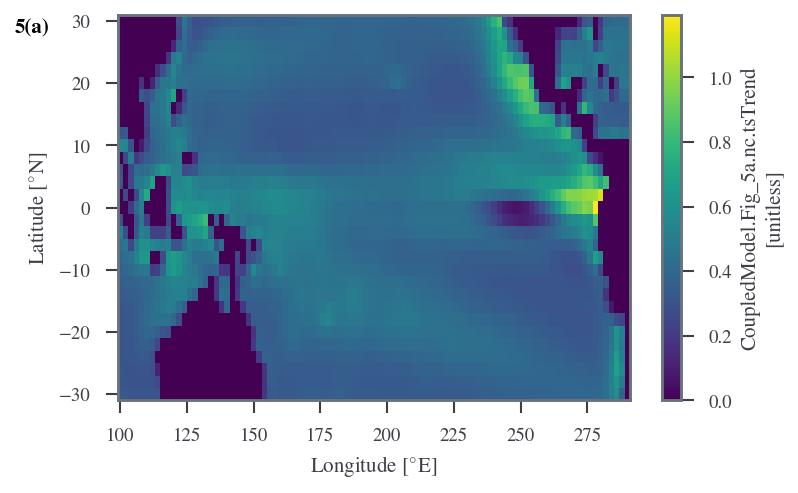

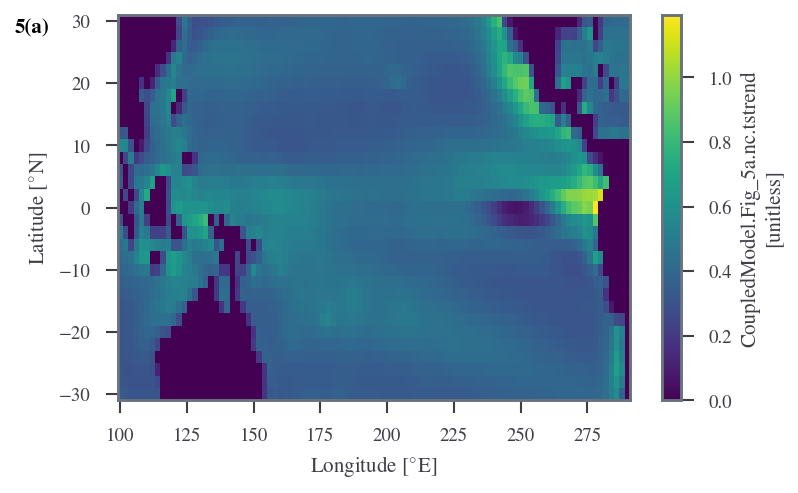

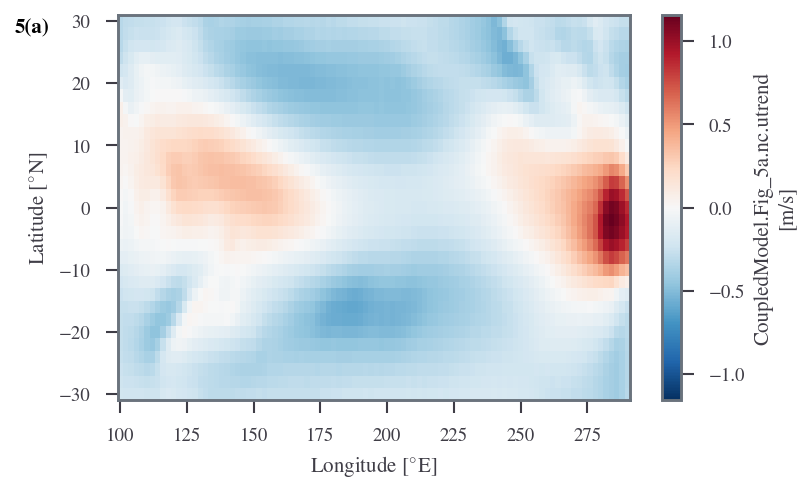

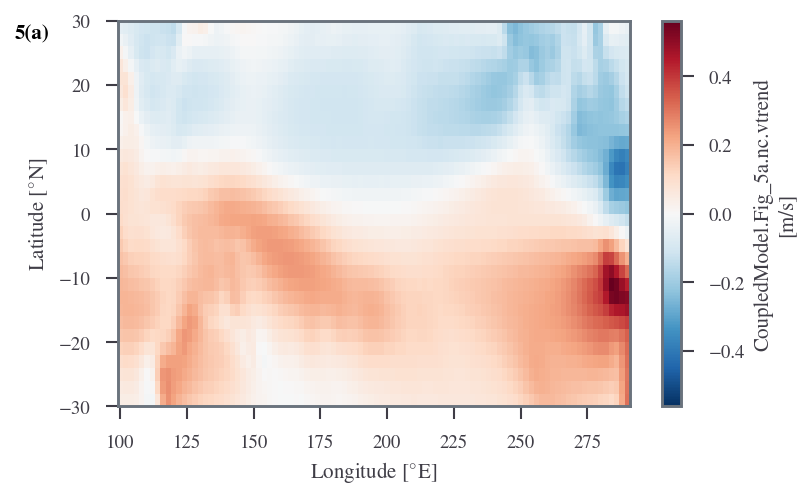

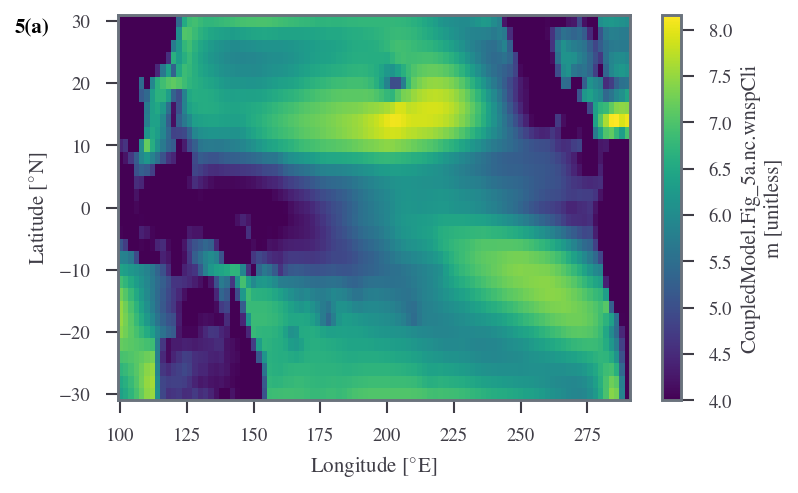

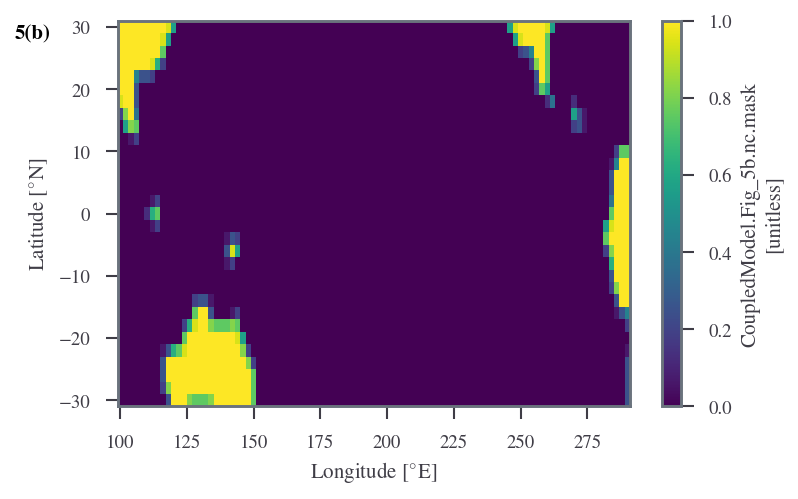

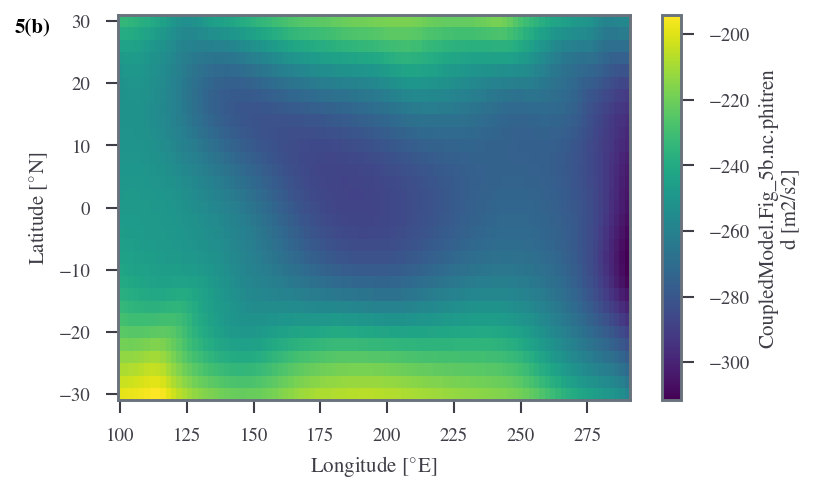

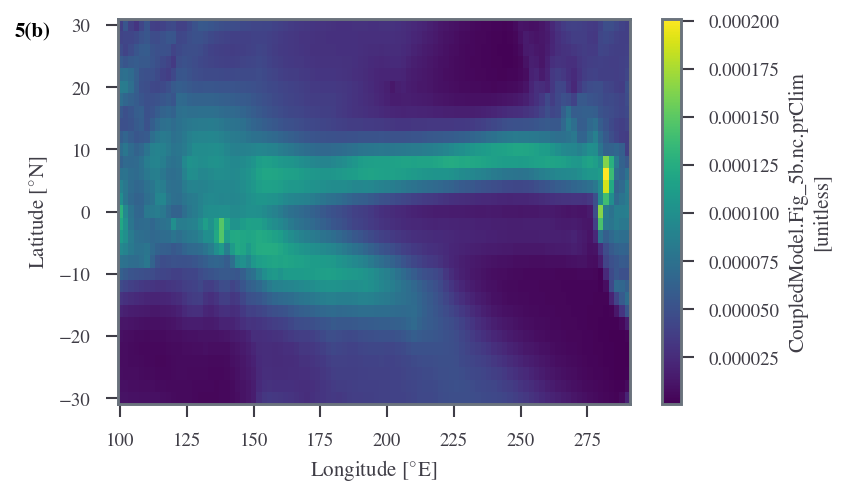

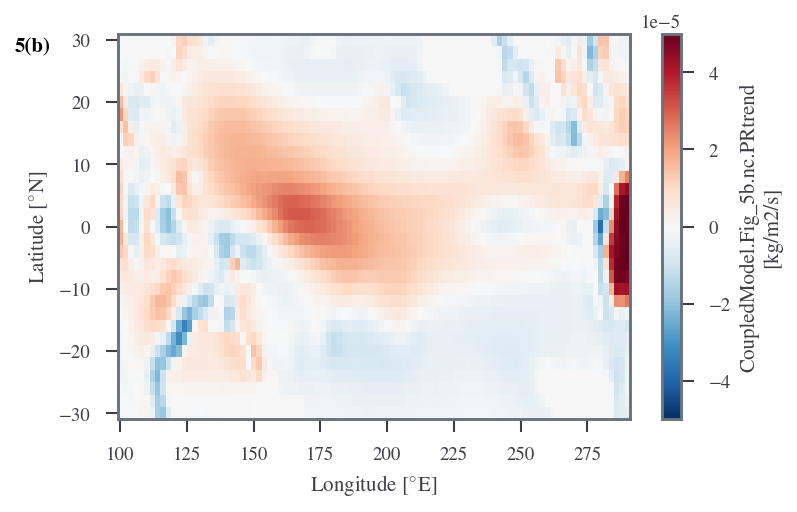

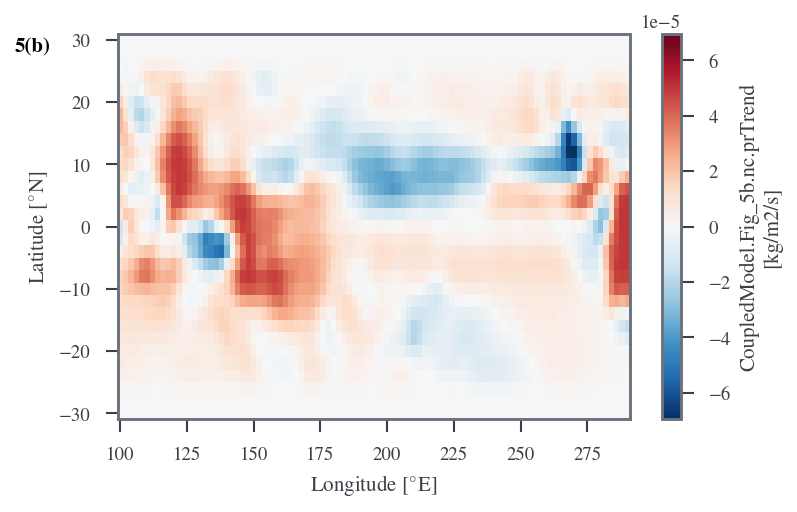

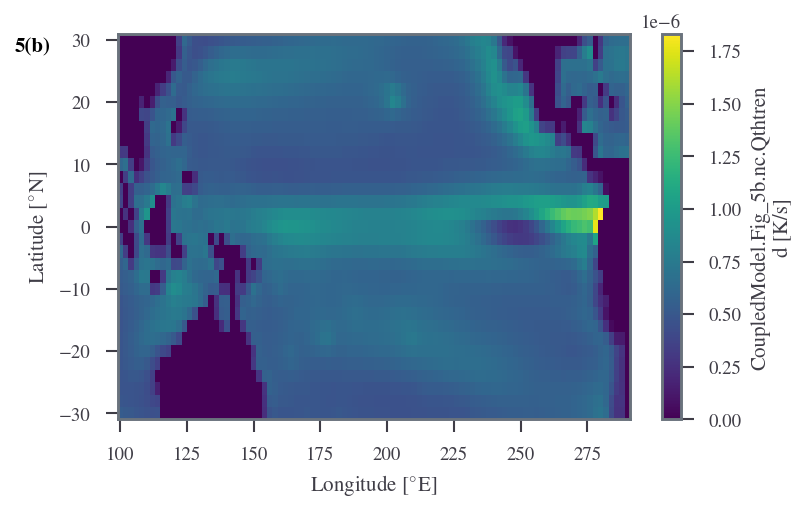

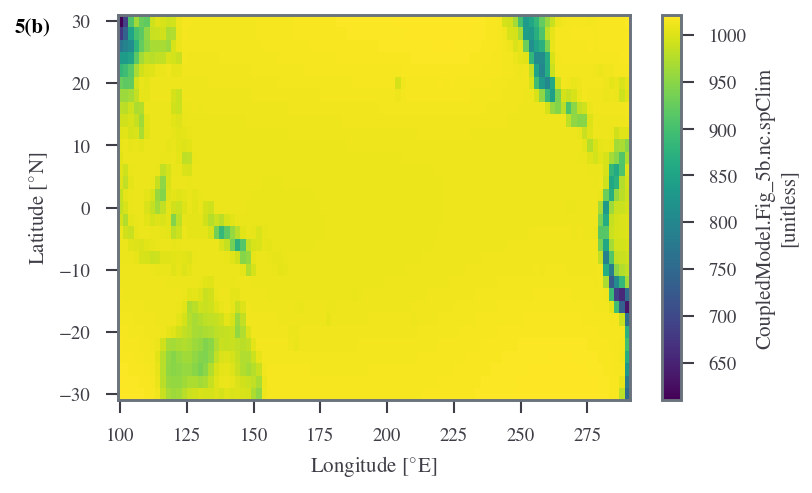

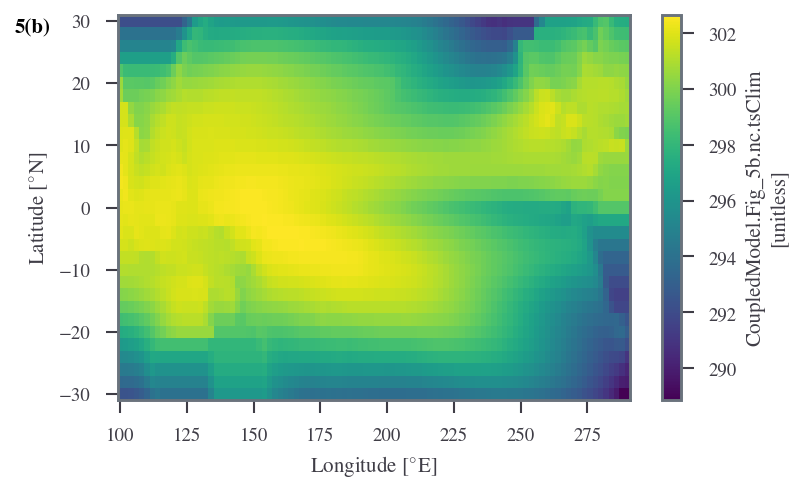

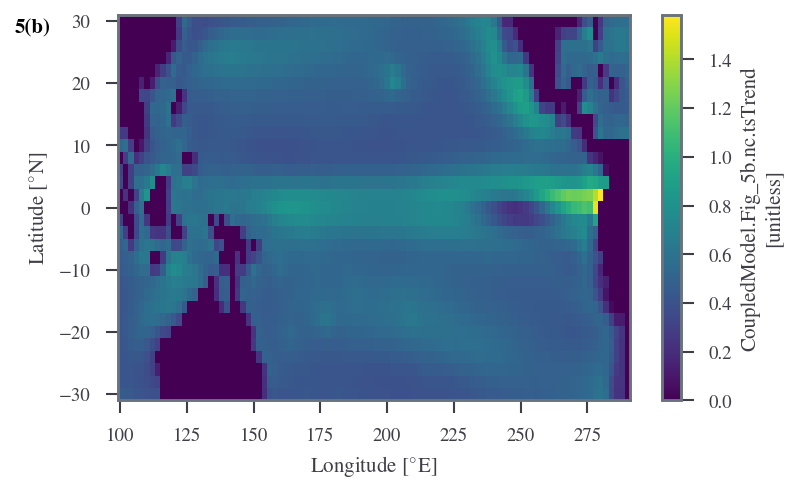

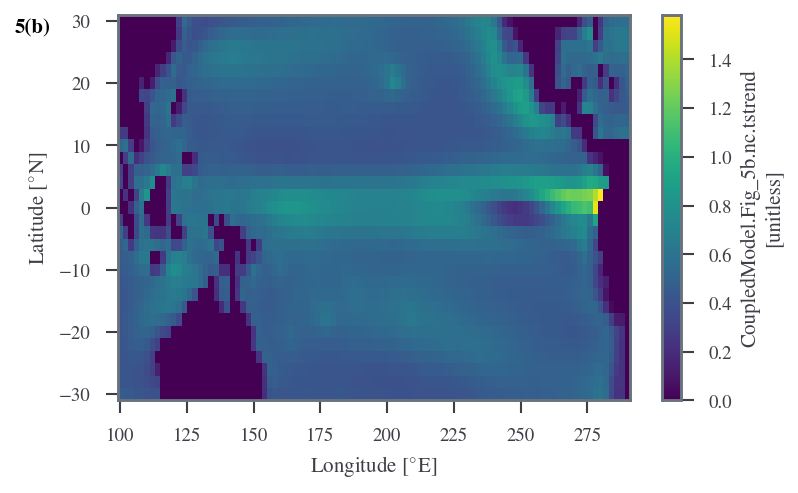

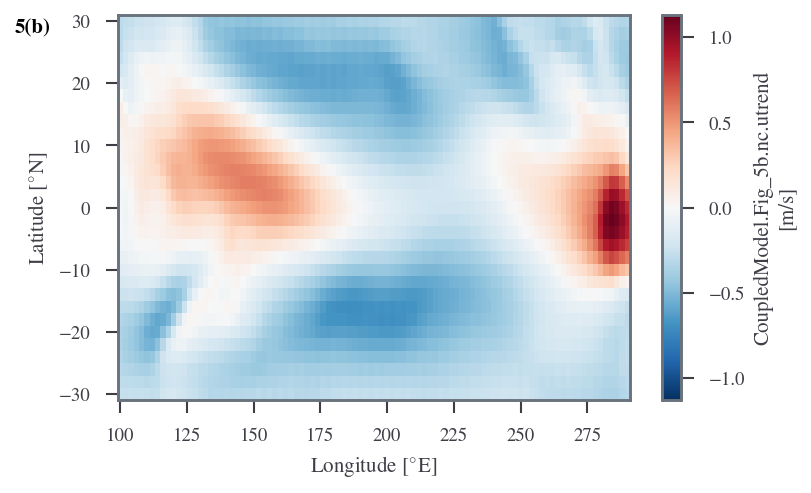

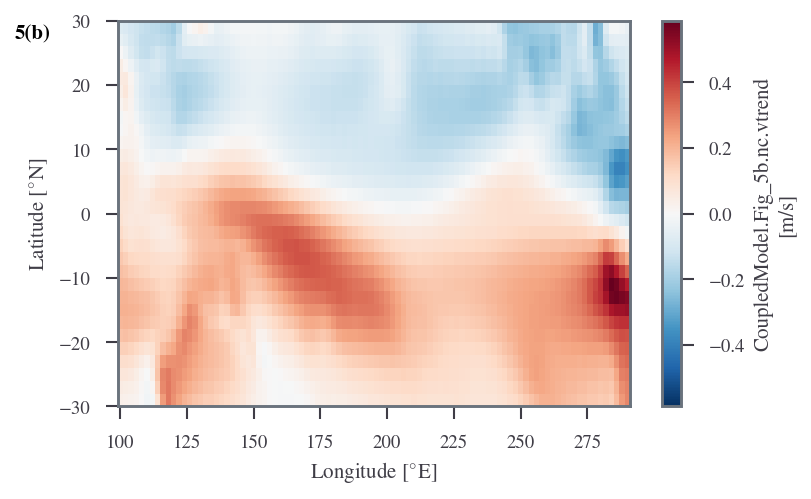

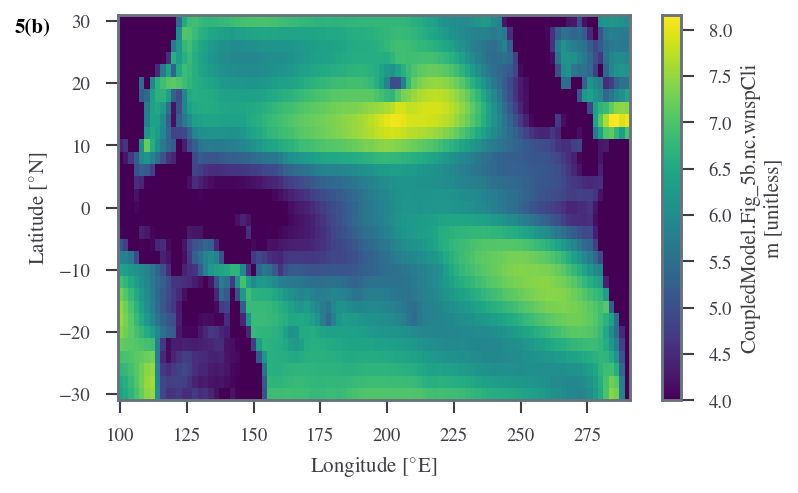

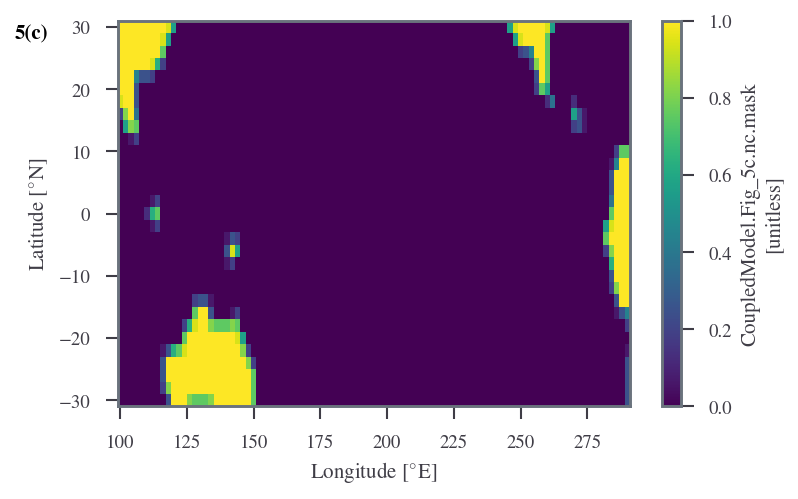

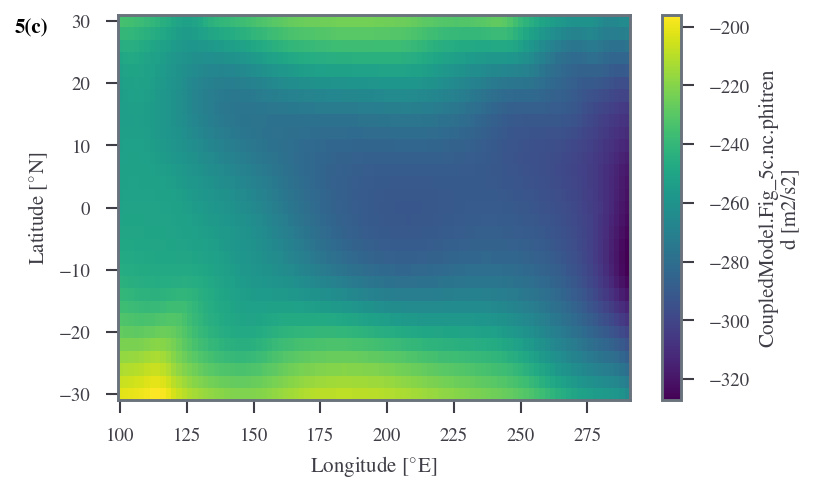

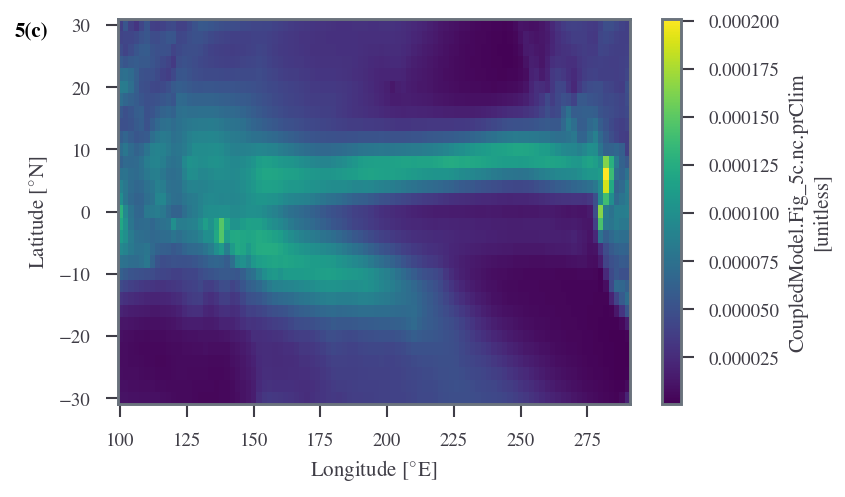

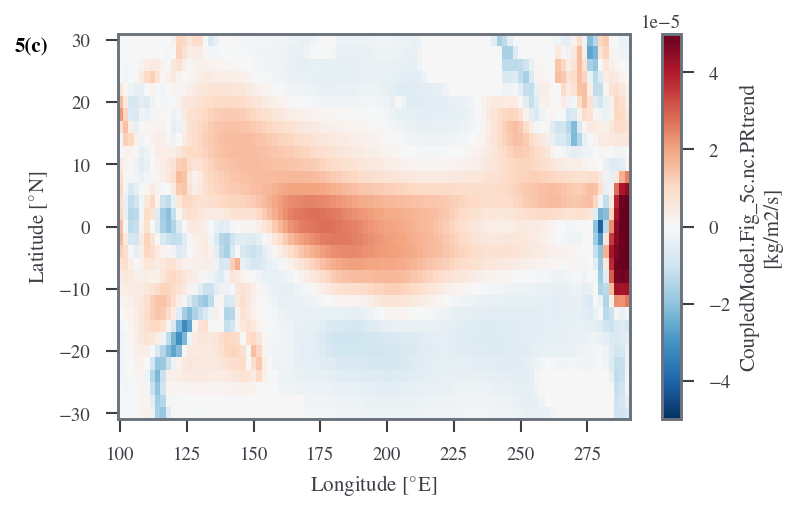

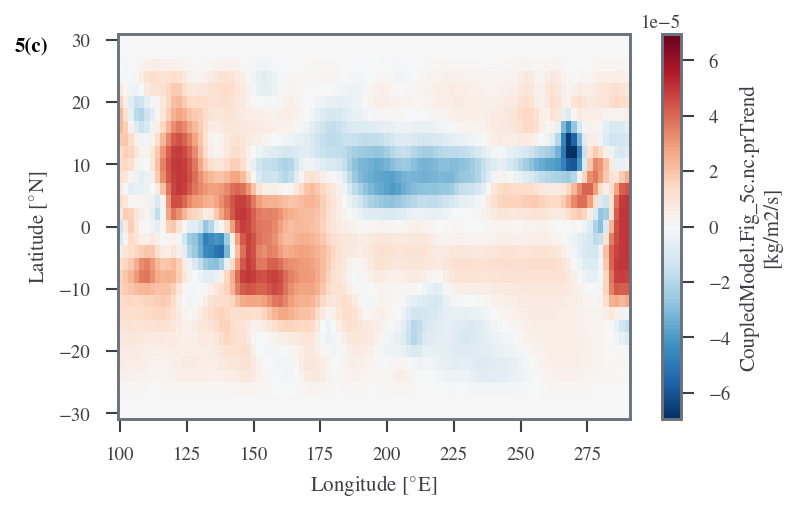

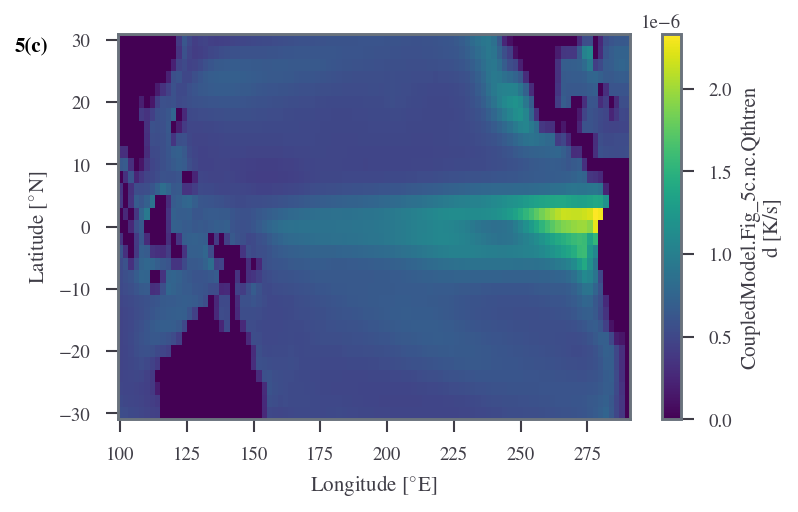

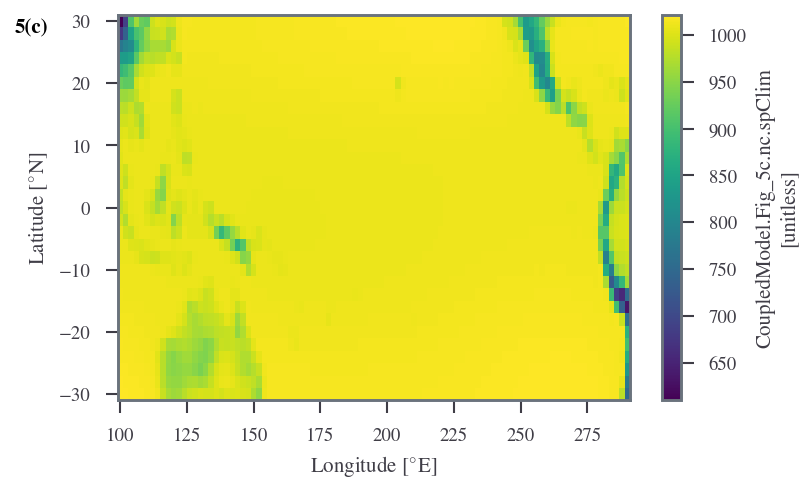

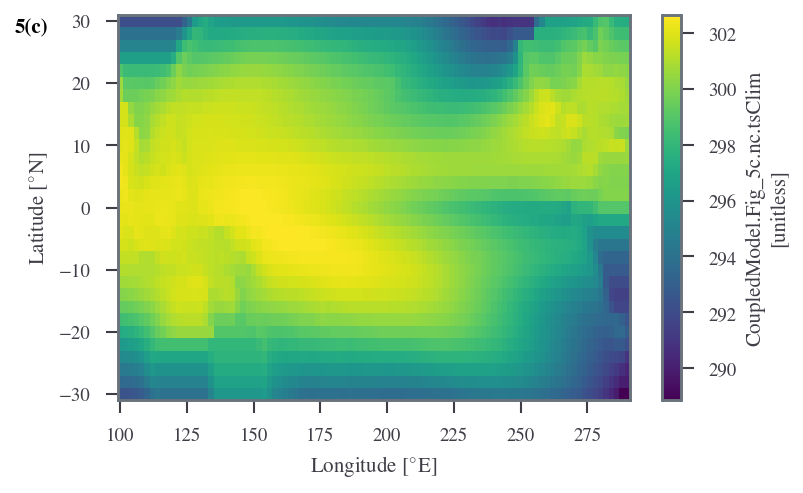

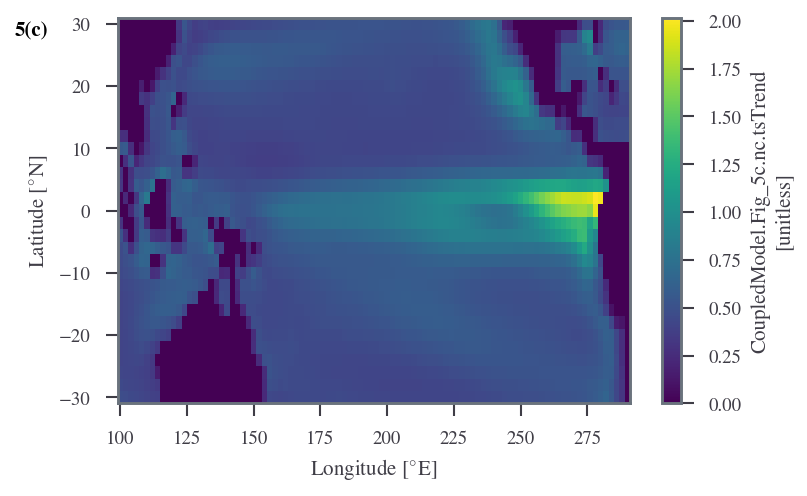

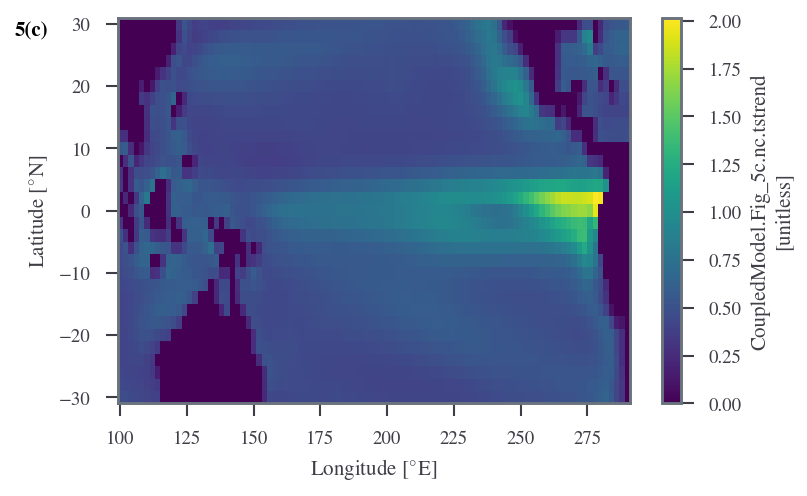

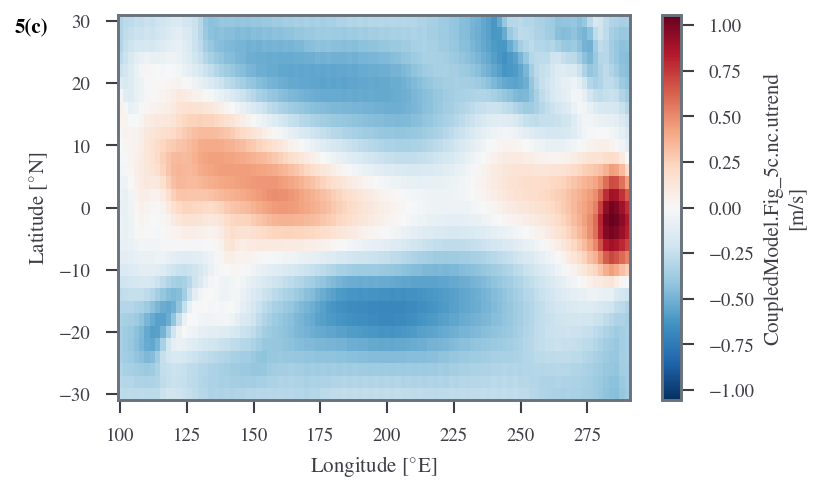

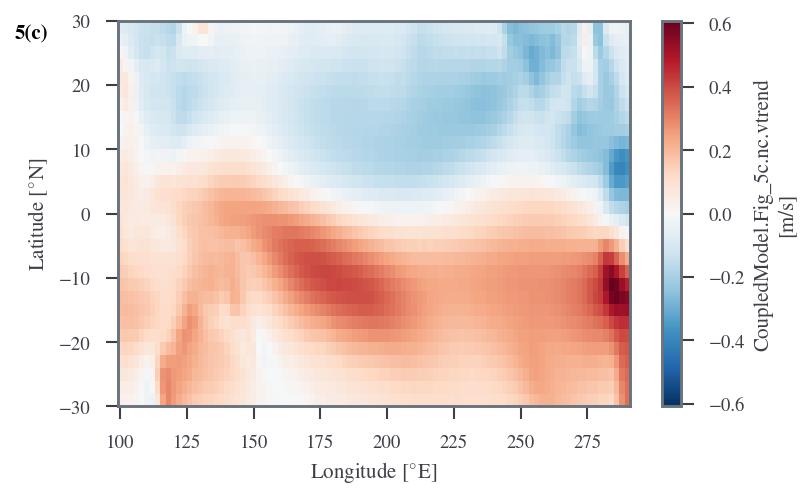

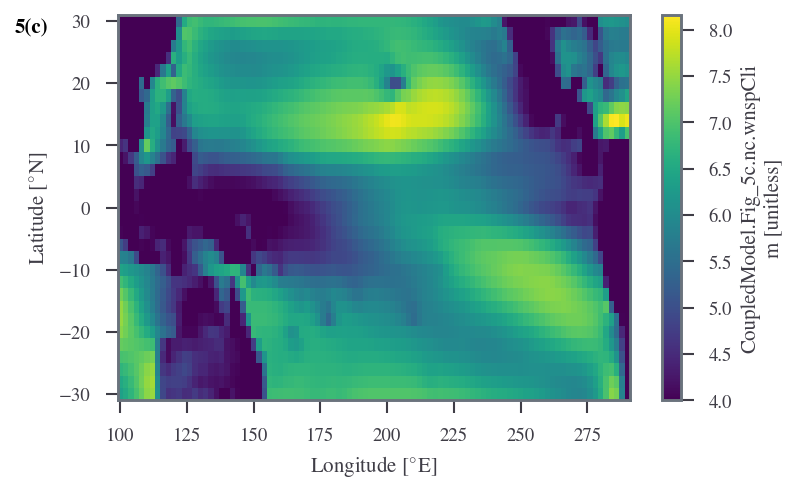

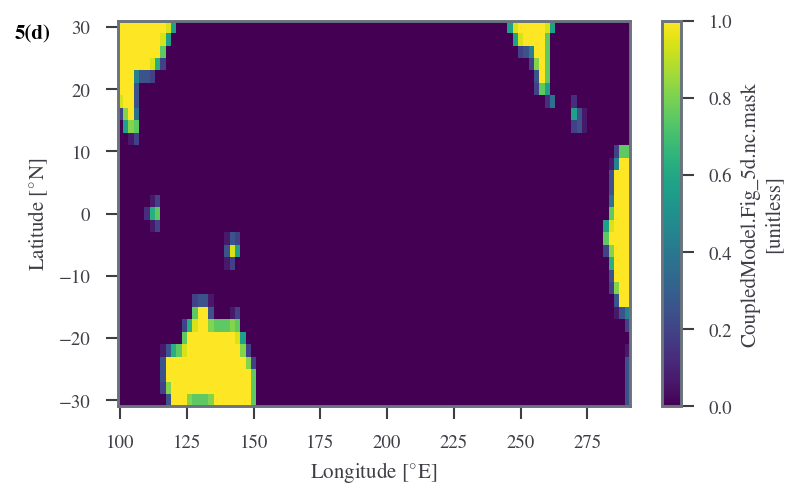

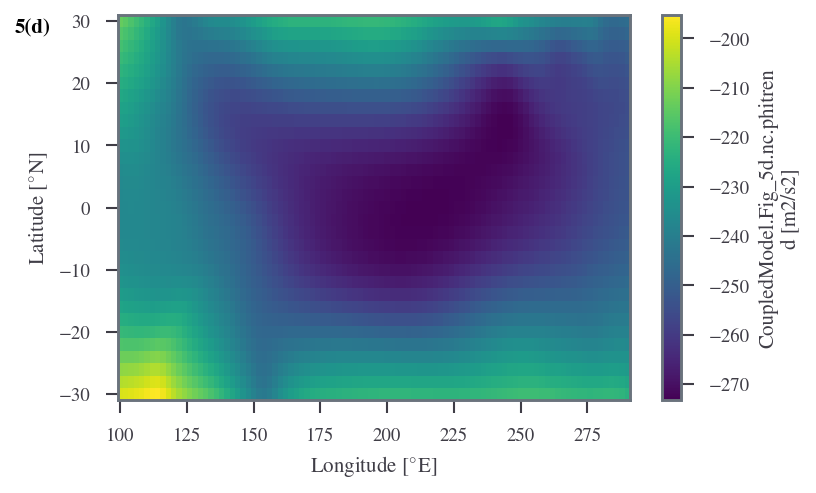

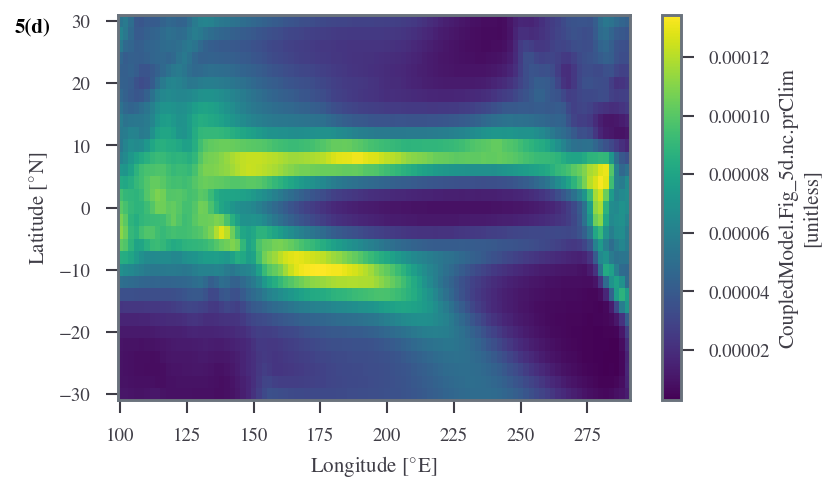

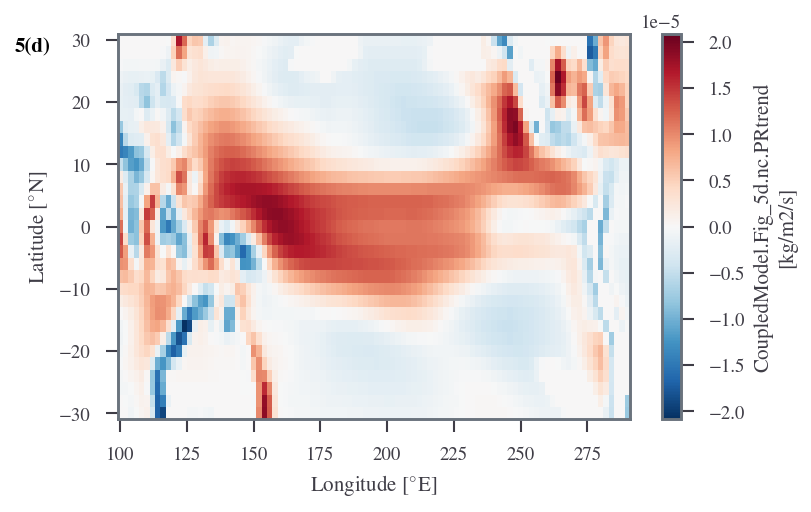

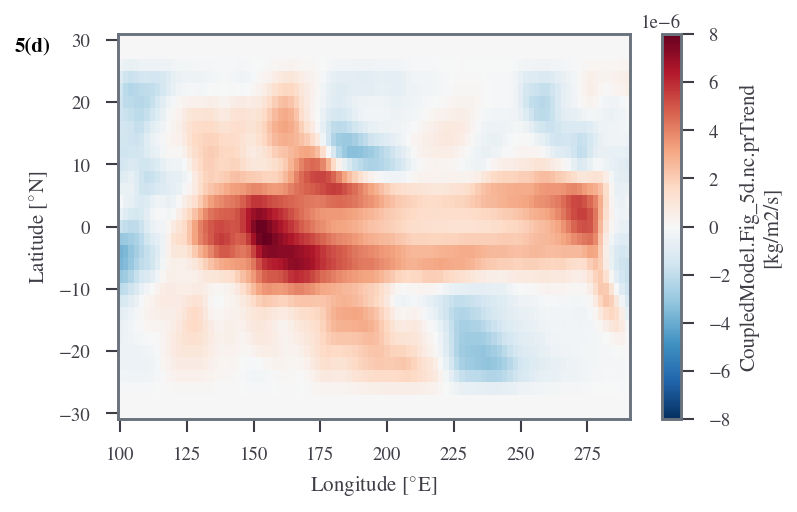

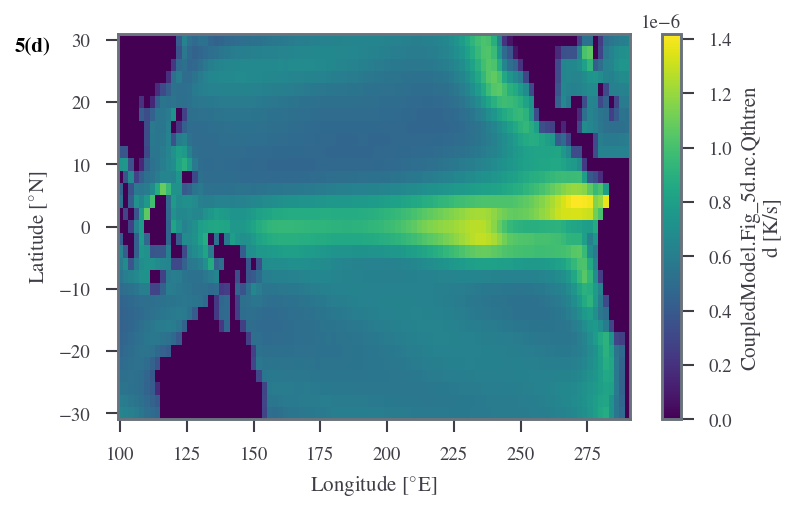

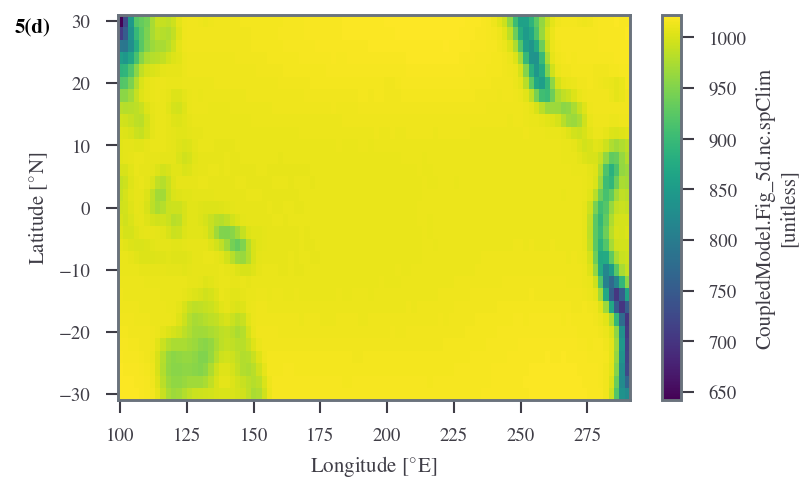

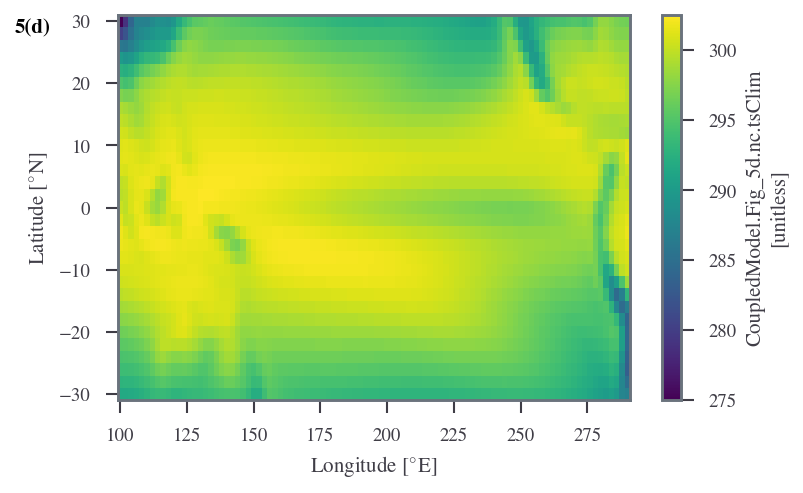

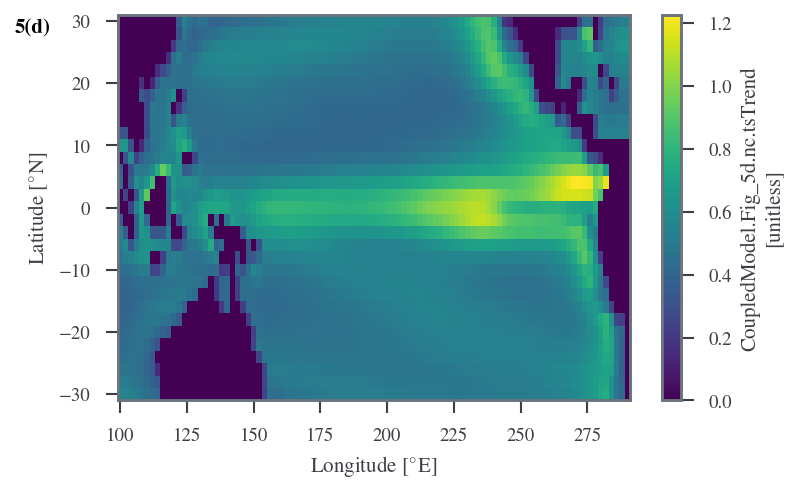

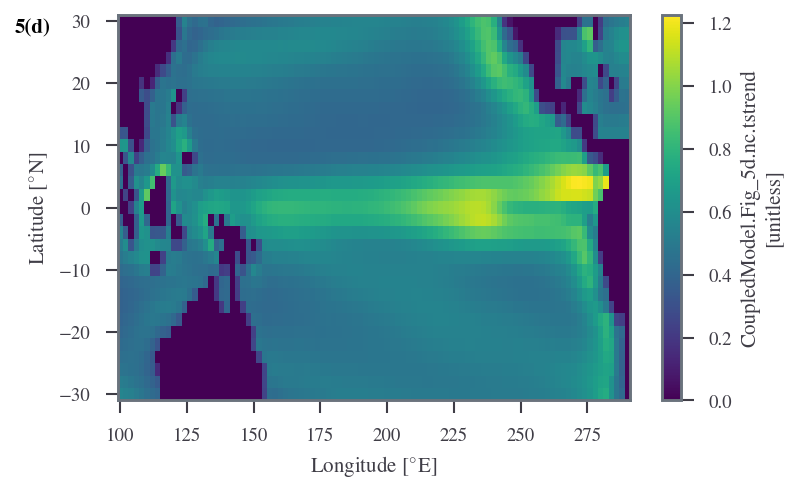

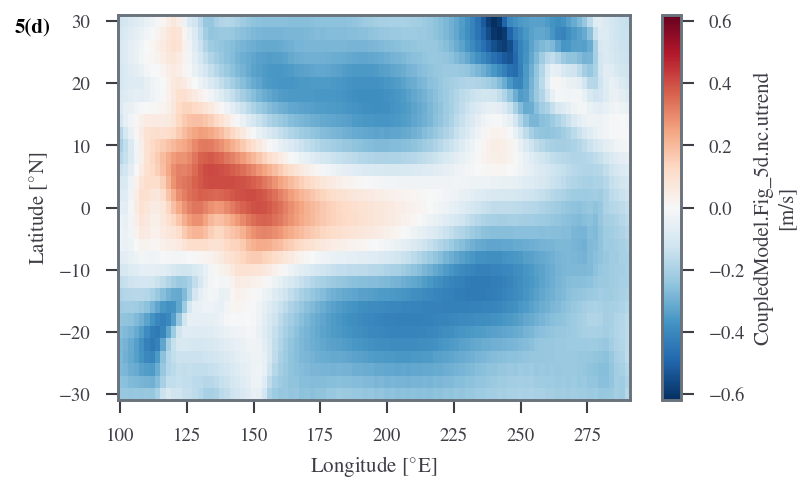

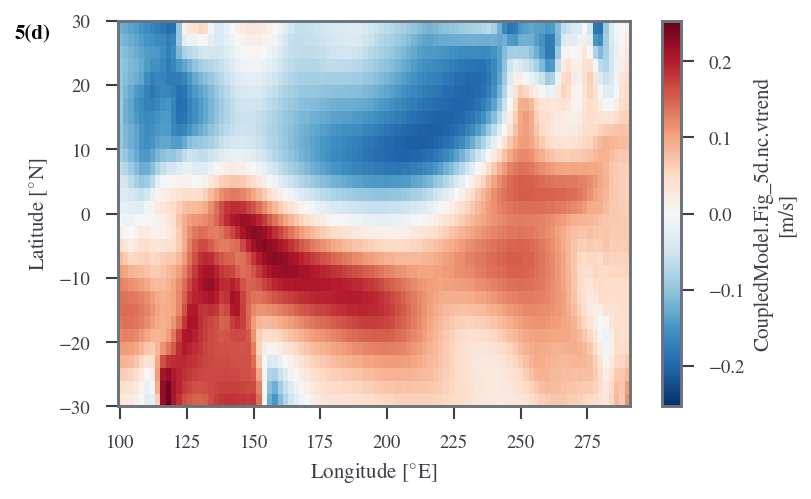

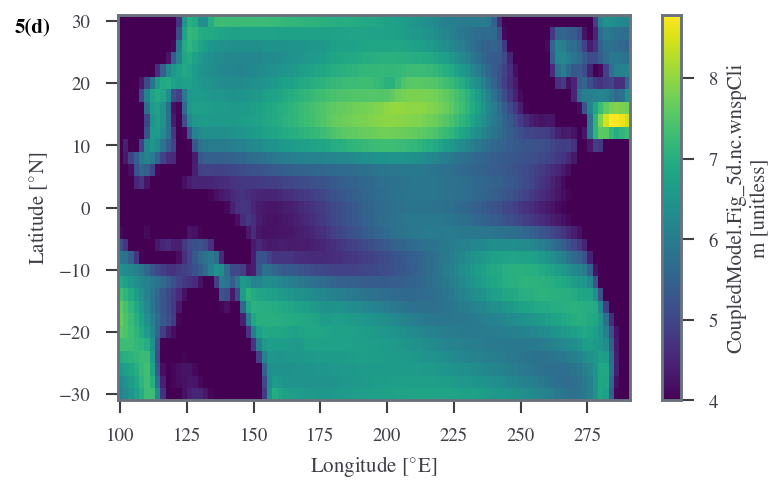

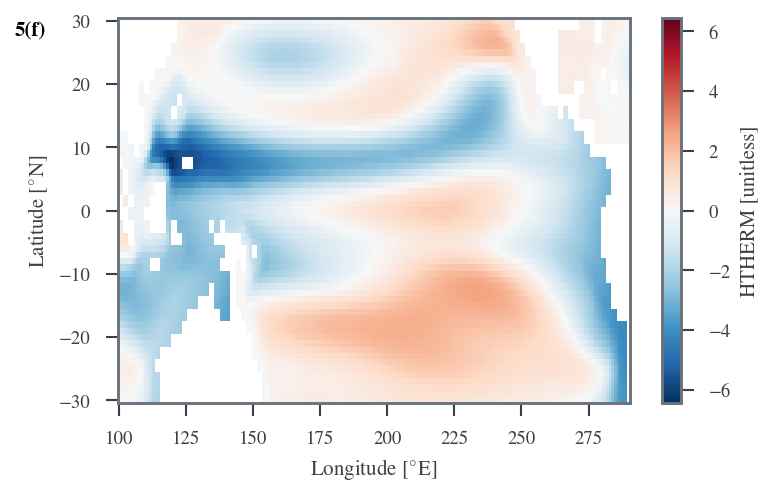

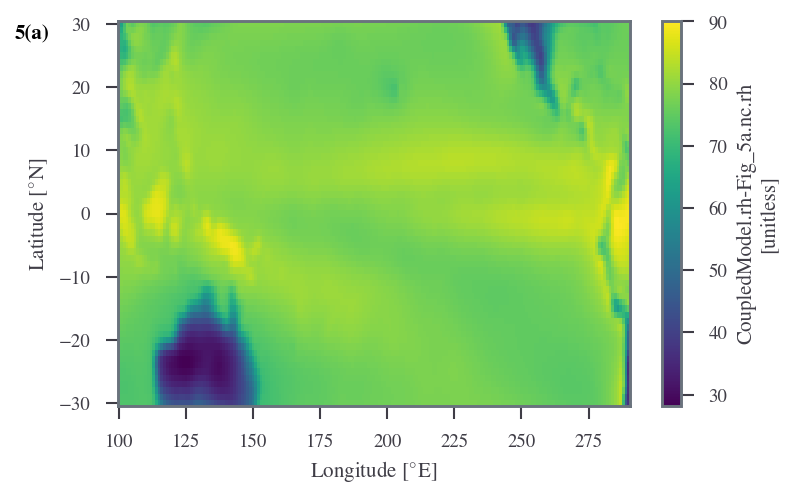

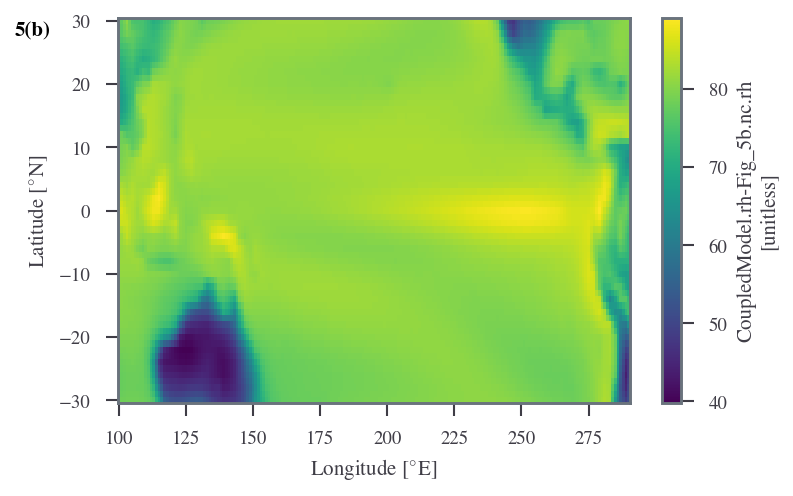

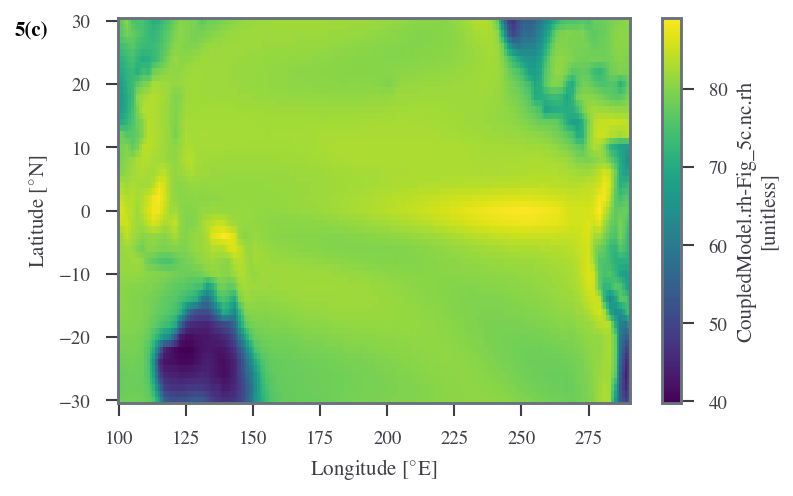

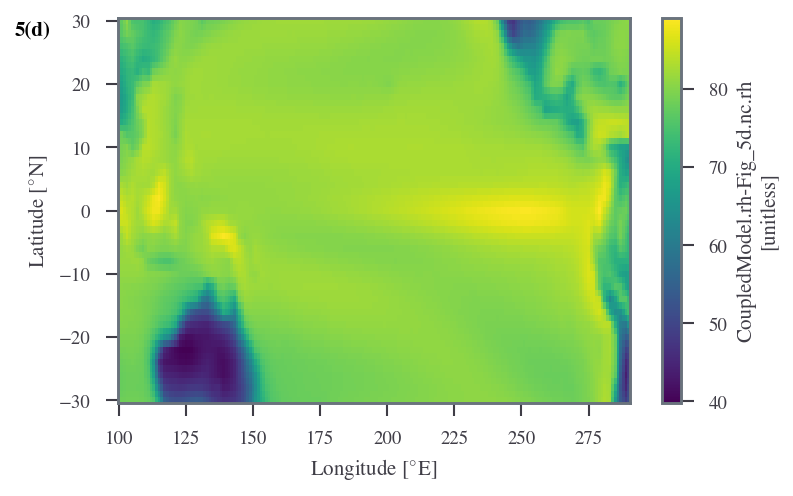

In [51]:
for i in range(1, 6):
    for var in return_var_list(i):
        da = xr.open_dataset(FIGURE_DATA_PATH)[var]
        dims = da.dims
        if dims in rename_dict:
            add_units(sel(da.rename(rename_dict[dims]))).plot()
            ax = plt.gca()
            fig_name = "Fig_" + str(i)
            index = var.index(fig_name)
            label = var[index + len(fig_name)]
            fontsize: int = 10
            x_pos: float = -0.2
            y_pos: float = 0.99
            ax.text(
                x_pos,
                y_pos,
                str(i) + "(" + label + ")",
                color="black",
                transform=ax.transAxes,
                fontsize=fontsize,
                fontweight="bold",
                va="top",
            )
            plt.show()